<h1><center>Fintech Capstone Project</center></h1>

![alt text](BG.jpeg)

<h2> Funding in startups </h2>

### **1. Introduction**
1. **Objective:**
    * The goal of this project is to analyze startup funding trends to uncover insights that guide strategic decision-making for aspiring entrepreneurs and investors. This involves identifying high-potential sectors, understanding funding success factors, and exploring the impact of economic conditions.


2. **Scope:**
    * The analysis focuses on:

        - Distribution of funding across different categories, markets, and regions.
        - Correlation between funding characteristics (e.g., rounds, types, locations) and funding success.
        - Economic factors influencing startup funding, such as GDP.
    

3. **Significance:**
    * Funding startups with revolutionary ideas can significantly impact innovation and economic growth. By leveraging insights from past funding trends, startups can better position themselves for success, and investors can make informed decisions about their portfolios. This study aims to provide actionable insights for navigating the dynamic landscape of startup financing.

---

### **2. Dataset Overview** 

1. **Source and Description:**
    - The primary dataset used for this analysis includes detailed information on startups, funding rounds, categories, markets, and regions. An additional dataset was integrated to include GDP data for the funding years.

2. **Primary Dataset:** Investments_VC (provided via Google Drive).
3. **Supplementary Dataset:** Economic indicators (via World Bank site).
4. **Key Attributes:**
    - Startup Details: Name, market, and region.
    - Funding Details: Funding amount, funding type, and funding round.
    - Timeline: Dates of funding.
    - Economic Data: GDP for corresponding years.
5. **Preprocessing Steps:**
    - Datatype Conversions: Converted columns like funding_amount and founded_at to numeric and datetime formats.
    - Data Cleaning: Removed duplicate rows and handled null values by:
        - Dropping rows with missing founded_at.
        - Imputing other missing values where appropriate.
    - Merging Datasets: Integrated GDP data based on the funding year to analyze economic influences.
    - Feature Engineering: Created new columns like year, category_broad/niche, and funding per GDP ratio to enrich the analysis

---

### **3. Methodology**  

#### **Analytical Approach:**  
The analysis was conducted using a combination of Python for data cleaning, exploratory data analysis (EDA), statistical tests and visualizations. The following steps were taken:
1. **Data Cleaning and Preprocessing:**  
   - Handled missing values and outliers.  
   - Converted relevant columns (e.g., dates and amounts) to appropriate datatypes.  
   - Merged economic datasets to enrich the analysis.  
2. **Exploratory Data Analysis (EDA):**  
   - Used Python libraries like Pandas, Matplotlib, and Seaborn to explore patterns and trends in the data.  
   - Analyzed the distribution of funding across categories, markets, and regions.  
3. **Advanced Statistical Analysis:**  
   - Performed hypothesis testing to evaluate relationships between variables (e.g., funding type and success rates).  
   - Assessed correlations between economic factors (e.g., GDP) and funding trends.  
4. **Visualization and Reporting:**  
   - Used Python for generating static visualizations to support statistical findings.  

#### **Research Questions:**  
1. **Market and Region Analysis:**  
   - Which markets and regions attract the most funding?  
   - How is funding distributed across broad and niche markets?  

2. **Funding Characteristics and Success:**  
   - What are the most common funding types in top regions and markets?  
   - How do funding rounds impact the average funding amounts?  

3. **Economic Impact:**  
   - How does GDP correlate with the funding amounts for a given year?  
   - Are there significant differences in funding during periods of economic growth vs. recession?  

4. **Trends Over Time:**  
   - How has the total funding amount evolved over the years?  
   - Which markets have shown the highest year-over-year growth in funding?  

5. **Strategic Insights:**  
   - What strategies can startups adopt to optimize their funding journeys?  
   - How can investors identify high-potential sectors for investment?  

By systematically addressing these questions, this study aims to provide actionable insights for stakeholders in the startup ecosystem.

---

### **4. Exploratory Data Analysis**

##### Importing the required libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as stats
from numpy.random import seed
from scipy.stats import pearsonr,ttest_rel,shapiro,spearmanr,f_oneway,levene,kruskal,ttest_ind,mannwhitneyu,chi2_contingency
import warnings

warnings.filterwarnings('ignore')

#pd.options.display.max_columns = None

##### Loading the dataset

In [3]:
df = pd.read_csv('Dataset/investments_VC.csv',encoding='unicode_escape')

In [4]:
df.head()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.shape

(54294, 39)

The dataset contains 54,294 records and 39 features, providing a rich foundation for analyzing trends and patterns in startup funding and related factors.
Let's understand the dataset more

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   permalink             49438 non-null  object 
 1   name                  49437 non-null  object 
 2   homepage_url          45989 non-null  object 
 3   category_list         45477 non-null  object 
 4    market               45470 non-null  object 
 5    funding_total_usd    49438 non-null  object 
 6   status                48124 non-null  object 
 7   country_code          44165 non-null  object 
 8   state_code            30161 non-null  object 
 9   region                44165 non-null  object 
 10  city                  43322 non-null  object 
 11  funding_rounds        49438 non-null  float64
 12  founded_at            38554 non-null  object 
 13  founded_month         38482 non-null  object 
 14  founded_quarter       38482 non-null  object 
 15  founded_year       

In [7]:
df.dtypes

permalink                object
name                     object
homepage_url             object
category_list            object
 market                  object
 funding_total_usd       object
status                   object
country_code             object
state_code               object
region                   object
city                     object
funding_rounds          float64
founded_at               object
founded_month            object
founded_quarter          object
founded_year            float64
first_funding_at         object
last_funding_at          object
seed                    float64
venture                 float64
equity_crowdfunding     float64
undisclosed             float64
convertible_note        float64
debt_financing          float64
angel                   float64
grant                   float64
private_equity          float64
post_ipo_equity         float64
post_ipo_debt           float64
secondary_market        float64
product_crowdfunding    float64
round_A 

In [8]:
df.describe()

,funding_rounds,founded_year,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
count,49438.000000,38482.000000,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,...,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04
mean,1.696205,2007.359129,2.173215e+05,7.501051e+06,6.163322e+03,1.302213e+05,2.336410e+04,1.888157e+06,6.541898e+04,1.628453e+05,...,3.845592e+04,7.074227e+03,1.243955e+06,1.492891e+06,1.205356e+06,7.375261e+05,3.424682e+05,1.697692e+05,5.767067e+04,1.423197e+04
std,1.294213,7.579203,1.056985e+06,2.847112e+07,1.999048e+05,2.981404e+06,1.432046e+06,1.382046e+08,6.582908e+05,5.612088e+06,...,3.864461e+06,4.282166e+05,5.531974e+06,7.472704e+06,7.993592e+06,9.815218e+06,5.406915e+06,6.277905e+06,5.252312e+06,2.716865e+06
min,1.000000,1902.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000,2006.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000,2010.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.000000,2012.000000,2.500000e+04,5.000000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,18.000000,2014.000000,1.300000e+08,2.351000e+09,2.500000e+07,2.924328e+08,3.000000e+08,3.007950e+10,6.359026e+07,7.505000e+08,...,6.806116e+08,7.200000e+07,3.190000e+08,5.420000e+08,4.900000e+08,1.200000e+09,4.000000e+08,1.060000e+09,1.000000e+09,6.000000e+08


In [9]:
df.nunique()

permalink               49436
name                    49350
homepage_url            45850
category_list           16675
 market                   753
 funding_total_usd      14617
status                      3
country_code              115
state_code                 61
region                   1089
city                     4188
funding_rounds             17
founded_at               3369
founded_month             420
founded_quarter           218
founded_year              103
first_funding_at         3914
last_funding_at          3657
seed                     3337
venture                  9300
equity_crowdfunding       252
undisclosed               687
convertible_note          299
debt_financing           1872
angel                     999
grant                     532
private_equity            847
post_ipo_equity           239
post_ipo_debt              57
secondary_market           20
product_crowdfunding      176
round_A                  2035
round_B                  1269
round_C   

In [10]:
df.sample(1).T

,27202
permalink,/organization/mobsmith
name,MobSmith
homepage_url,http://www.mobsmith.com
category_list,|Advertising|
market,Advertising
funding_total_usd,"5,75,000"
status,acquired
country_code,USA
state_code,CA
region,CA - Other


In [11]:
df.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', ' market ',
       ' funding_total_usd ', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')

Let's drop the unnecessary columns so the dataset becomes more focused, ensuring analysis is streamlined and relevant to the core objectives of the project.

In [12]:
df.drop(columns=['permalink','homepage_url','founded_month','founded_quarter'],inplace=True)

Now let's merge multiple columns into a single funding_type column to consolidate similar data, simplifying analysis and ensuring consistency.

In [13]:
columns_to_check = ['seed', 'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note',
                    'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
                    'post_ipo_debt', 'secondary_market', 'product_crowdfunding']

# Create a boolean DataFrame where True indicates values > 0
bool_df = df[columns_to_check] > 0

# Sum across each row to count the number of True values (i.e., values > 0)
count_non_zero = bool_df.sum(axis=1)

df[count_non_zero>1].head()

,name,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
15,10 Minutes With,|Education|,Education,"44,00,000",operating,GBR,NaN,London,London,2.0,...,0.0,0.0,4000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,1000memories,|Curated Web|,Curated Web,"25,35,000",acquired,USA,CA,SF Bay Area,San Francisco,2.0,...,0.0,0.0,2520000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,1000museums.com,|Curated Web|,Curated Web,"49,62,651",operating,USA,WA,Seattle,Bellevue,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,1001 Menus,|Local Businesses|Restaurants|,Restaurants,"40,59,079",operating,FRA,NaN,Paris,Paris,4.0,...,0.0,0.0,3536910.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27,100Plus,|Analytics|,Analytics,"12,50,000",acquired,USA,CA,SF Bay Area,San Francisco,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# Create a new column 'funding_types' that lists all funding types with non-zero values
df['funding_types'] = df.apply(lambda row: ', '.join([col for col in columns_to_check if row[col] > 0]), axis=1)

# # Create a new column 'funding_total' that sums all non-zero funding values
# df['funding_total'] = df[columns_to_check].sum(axis=1)

# Drop the original funding columns if desired
df = df.drop(columns=columns_to_check)
df.head()

,name,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,...,last_funding_at,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,funding_types
0,#waywire,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,New York,1.0,...,2012-06-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,seed
1,&TV Communications,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,Los Angeles,2.0,...,2010-09-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,venture
2,'Rock' Your Paper,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,Tallinn,1.0,...,2012-08-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,seed
3,(In)Touch Network,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,London,1.0,...,2011-04-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,seed
4,-R- Ranch and Mine,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,Fort Worth,2.0,...,2014-09-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,equity_crowdfunding


Let's rename the column for market and funding_total_usd for proper consistency

In [15]:
df.rename(columns={' market ':'market', ' funding_total_usd ':'funding_total_usd'},inplace=True)

##### Datatype conversion 

In [16]:
df['status'] = df['status'].astype('category')

In [18]:
datetime_columns = ['founded_at', 'first_funding_at', 'last_funding_at']
for i in datetime_columns:
    df[i] = pd.to_datetime(df[i], errors='coerce')

In [19]:
df['founded_year'] = pd.to_datetime(df['founded_year'],format='%Y')

##### Handling missing values

In [20]:
df.isnull().sum()

name                  4857
category_list         8817
market                8824
funding_total_usd     4856
status                6170
country_code         10129
state_code           24133
region               10129
city                 10972
funding_rounds        4856
founded_at           15741
founded_year         15812
first_funding_at      4866
last_funding_at       4862
round_A               4856
round_B               4856
round_C               4856
round_D               4856
round_E               4856
round_F               4856
round_G               4856
round_H               4856
funding_types            0
dtype: int64

We can clearly see there are numerous missing values across different features. Let's try to handle it

In [21]:
df['funding_types'] = df['funding_types'].apply(lambda x: np.nan if x=='' else x)
df['funding_types'].isna().sum()

13387

Let's first remove the if all the values in a row is null

In [22]:
df.dropna(axis = 0, how = 'all', inplace = True)

In [23]:
df['name'].isna().value_counts()

name
False    49437
True         1
Name: count, dtype: int64

In [24]:
df = df.dropna(subset=['name'])

In [25]:
df['founded_year'] = df['founded_year'].fillna(df['first_funding_at'].dt.year)
df['founded_at'] = df['founded_at'].fillna(df['first_funding_at'].dt.year)

In [26]:
df[df['founded_at'].isnull()]

,name,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,...,last_funding_at,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,funding_types
39,12 Labs,|Personal Health|Health and Wellness|,Personal Health,-,operating,NaN,NaN,NaN,NaN,1.0,...,NaT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
36309,Rotor,|Developer Tools|Music|Video|,Video,-,operating,IRL,NaN,Dublin,Dublin,1.0,...,NaT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
38070,Shopboostr,|SaaS|Reviews and Recommendations|E-Commerce|,SaaS,-,operating,NaN,NaN,NaN,NaN,1.0,...,NaT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
42916,The Urban Roosters,NaN,NaN,-,operating,NaN,NaN,NaN,NaN,1.0,...,NaT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [27]:
df = df.dropna(subset=['founded_at'])

In [28]:
df[df['region'].isnull() & df['city'].notnull()].head()

,name,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,...,last_funding_at,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,funding_types


If there is any region or country_code missing let's update it with a value 'Unknown'

In [29]:
df['region'].fillna('Unknown', inplace=True)

df['country_code'].fillna('Unknown', inplace=True)

Removing state and city columns as this does't fit much into our anlaysis

In [30]:
df = df.drop(columns=['state_code', 'city'])

Finding if there is any row where a category list is not null but market is null. If so let's update the market with the first category in the category list column.

In [31]:
df[df['category_list'].notnull() & df['market'].isnull()]

,name,category_list,market,funding_total_usd,status,country_code,region,funding_rounds,founded_at,founded_year,...,last_funding_at,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,funding_types
2546,AnonaBox,|Consumer Electronics|,NaN,"6,00,000",operating,USA,Sacramento Valley,1.0,2014.0,2014.0,...,2014-10-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,product_crowdfunding
9174,Cognea,|Pervasive Computing|Startups|,NaN,-,acquired,Unknown,Unknown,1.0,2014.0,2014.0,...,2014-03-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
11735,Digitalcade,|Entertainment|Skill Gaming|Mobile|,NaN,"1,00,000",operating,Unknown,Unknown,1.0,2012-03-01 00:00:00,2012-01-01 00:00:00,...,2014-10-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,angel
18973,High Brew Coffee,|Consumer Goods|Coffee|Brewing|,NaN,"44,00,000",operating,USA,Austin,1.0,2013-01-01 00:00:00,2013-01-01 00:00:00,...,2014-08-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,venture
22974,Klique,|Group Email|Group SMS|Social Media|,NaN,"20,75,000",operating,USA,"Naples, Florida",1.0,2013-01-01 00:00:00,2013-01-01 00:00:00,...,2014-04-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,debt_financing
43167,Three Spires Brewing Co,|Brewing|,NaN,"30,000",operating,Unknown,Unknown,1.0,2013-10-01 00:00:00,2013-01-01 00:00:00,...,2014-02-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,undisclosed
44766,Ubalo,|Cloud Computing|Pervasive Computing|,NaN,-,acquired,Unknown,Unknown,1.0,2011-01-01 00:00:00,2011-01-01 00:00:00,...,2012-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [32]:
# Define a function to update 'market' based on 'category_list'
def update_market(row):
    
    # Check if 'category_list' is not null
    if pd.notnull(row['category_list']):

        # Split 'category_list' into individual categories
        categories = row['category_list'].split('|')
        
        # Check if any category is already used as a 'market' value in the DataFrame
        matching_market = next((cat for cat in categories if cat in df['market'].values), None)
        
        # Assign 'market' based on the match or the first category
        return matching_market if matching_market else categories[1]
    else:
        # If 'category_list' is null, return the current 'market' value (it may be null or already filled)
        return row['market']

# Apply the function to rows where 'market' is null
df['market'] = df.apply(lambda row: update_market(row) if pd.isnull(row['market']) else row['market'], axis=1)


If there is any market or vategory list missing let's update it with a value 'Unknown'

In [33]:
df['market'].fillna('Unknown', inplace=True)
df['category_list'].fillna('|Unknown|', inplace=True)

In [34]:
df['status'].unique()

['acquired', 'operating', NaN, 'closed']
Categories (3, object): ['acquired', 'closed', 'operating']

In [35]:
df['status'] = df['status'].cat.add_categories('Unknown')
df['status'].fillna('Unknown', inplace=True)

In [36]:
df['funding_total_usd'] = df['funding_total_usd'].str.strip()
df['funding_total_usd'] = df['funding_total_usd'].str.replace('-','').str.replace(',','').replace('',0).dropna().astype('float')

If funding total is null, update the value as 0

In [37]:
df['funding_total_usd'] = df['funding_total_usd'].apply(lambda x: 0 if pd.isnull(x) else x)
df['funding_types'].fillna('Unknown', inplace=True)

Let's replace the founded_at column value with the sart of the first_funding_at year

In [38]:
# Update founded_at for values containing '.0' to the start of the year in first_funding_at
df['founded_at'] = df.apply(
    lambda row: pd.Timestamp(f"{row['first_funding_at'].year}-01-01") if '.0' in str(row['founded_at']) else row['founded_at'],
    axis=1
)

# Convert founded_at to datetime format
df['founded_at'] = pd.to_datetime(df['founded_at'], errors='coerce')

# Extract only the year for founded_year
df['founded_year'] = df['founded_at'].dt.year

In [39]:
df[df['first_funding_at'].isnull()]

,name,category_list,market,funding_total_usd,status,country_code,region,funding_rounds,founded_at,founded_year,...,last_funding_at,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,funding_types
1492,AgFlow,|Software|,Software,0.0,operating,CHE,Geneva,2.0,2012-08-01,2012,...,2013-06-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Unknown
6661,Buru Buru,|Startups|Internet|Retail|Design|Art|E-Commerce|,Startups,0.0,operating,ITA,Firenze,3.0,2012-01-01,2012,...,2013-04-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Unknown
14524,Exploco,|Adventure Travel|,Adventure Travel,0.0,operating,AUS,Perth,1.0,2014-10-01,2014,...,NaT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Unknown
29695,Nubank,|Consumer Internet|Financial Services|,Financial Services,16300000.0,operating,BRA,Sao Paulo,2.0,2013-01-01,2013,...,2014-09-25,14300000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"seed, venture"
31865,PeopleGoal,|Enterprise Software|,Enterprise Software,0.0,operating,Unknown,Unknown,1.0,2014-01-10,2014,...,NaT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Unknown
37313,SecureNet Payment Systems,|Trading|Mobile Payments|Payments|E-Commerce|,Payments,18000000.0,acquired,USA,Austin,2.0,1997-01-01,1997,...,2012-07-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,private_equity


In [40]:
df = df.dropna(subset=['first_funding_at', 'last_funding_at'], how='all')

Let's similarly find the average time gap for first_funding_at and founded_at columns and update the value for first_funding_at

In [41]:
median_gap = (df['first_funding_at'] - df['founded_at']).median()
median_gap

Timedelta('334 days 00:00:00')

In [42]:
df['first_funding_at'] = df.apply(lambda row: row['founded_at'] + median_gap if pd.isnull(row['first_funding_at']) else row['first_funding_at'], axis=1)

In [43]:
df.isnull().sum()

name                 0
category_list        0
market               0
funding_total_usd    0
status               0
country_code         0
region               0
funding_rounds       0
founded_at           0
founded_year         0
first_funding_at     0
last_funding_at      0
round_A              0
round_B              0
round_C              0
round_D              0
round_E              0
round_F              0
round_G              0
round_H              0
funding_types        0
dtype: int64

We have successfully handled missing data by removing rows with critical null values and imputing others, ensuring the dataset's completeness and reliability for analysis.

##### Handling Outliers

In [44]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
funding_total_usd,49431.0,13168531.45079,0.0,50000.0,1000000.0,6777165.0,30079503000.0,153564806.409666
funding_rounds,49431.0,1.696304,1.0,1.0,1.0,2.0,18.0,1.294278
founded_at,49431,2008-01-25 17:58:44.403714048,1785-01-01 00:00:00,2006-09-01 00:00:00,2010-01-01 00:00:00,2012-01-01 00:00:00,2014-12-13 00:00:00,NaN
founded_year,49431.0,2007.905525,1785.0,2006.0,2010.0,2012.0,2014.0,8.812667
first_funding_at,49431,2011-03-12 23:36:38.191418112,1921-09-01 00:00:00,2009-08-23 12:00:00,2011-12-12 00:00:00,2013-08-01 00:00:00,2014-12-31 00:00:00,NaN
last_funding_at,49431,2012-01-19 13:01:55.142319616,1921-09-01 00:00:00,2010-10-14 00:00:00,2012-12-07 00:00:00,2014-02-01 00:00:00,2015-01-01 00:00:00,NaN
round_A,49431.0,1244131.17926,0.0,0.0,0.0,0.0,319000000.0,5532345.916664
round_B,49431.0,1493102.564666,0.0,0.0,0.0,0.0,542000000.0,7473212.436236
round_C,49431.0,1205526.495195,0.0,0.0,0.0,0.0,490000000.0,7994144.856596
round_D,49431.0,737630.502519,0.0,0.0,0.0,0.0,1200000000.0,9815909.226479


In [45]:
float_col_df = df.select_dtypes(include='float')
float_col_df.columns

Index(['funding_total_usd', 'funding_rounds', 'round_A', 'round_B', 'round_C',
       'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')

In [46]:
float_col_df.head()

,funding_total_usd,funding_rounds,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,1750000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4000000.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,40000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1500000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,60000.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


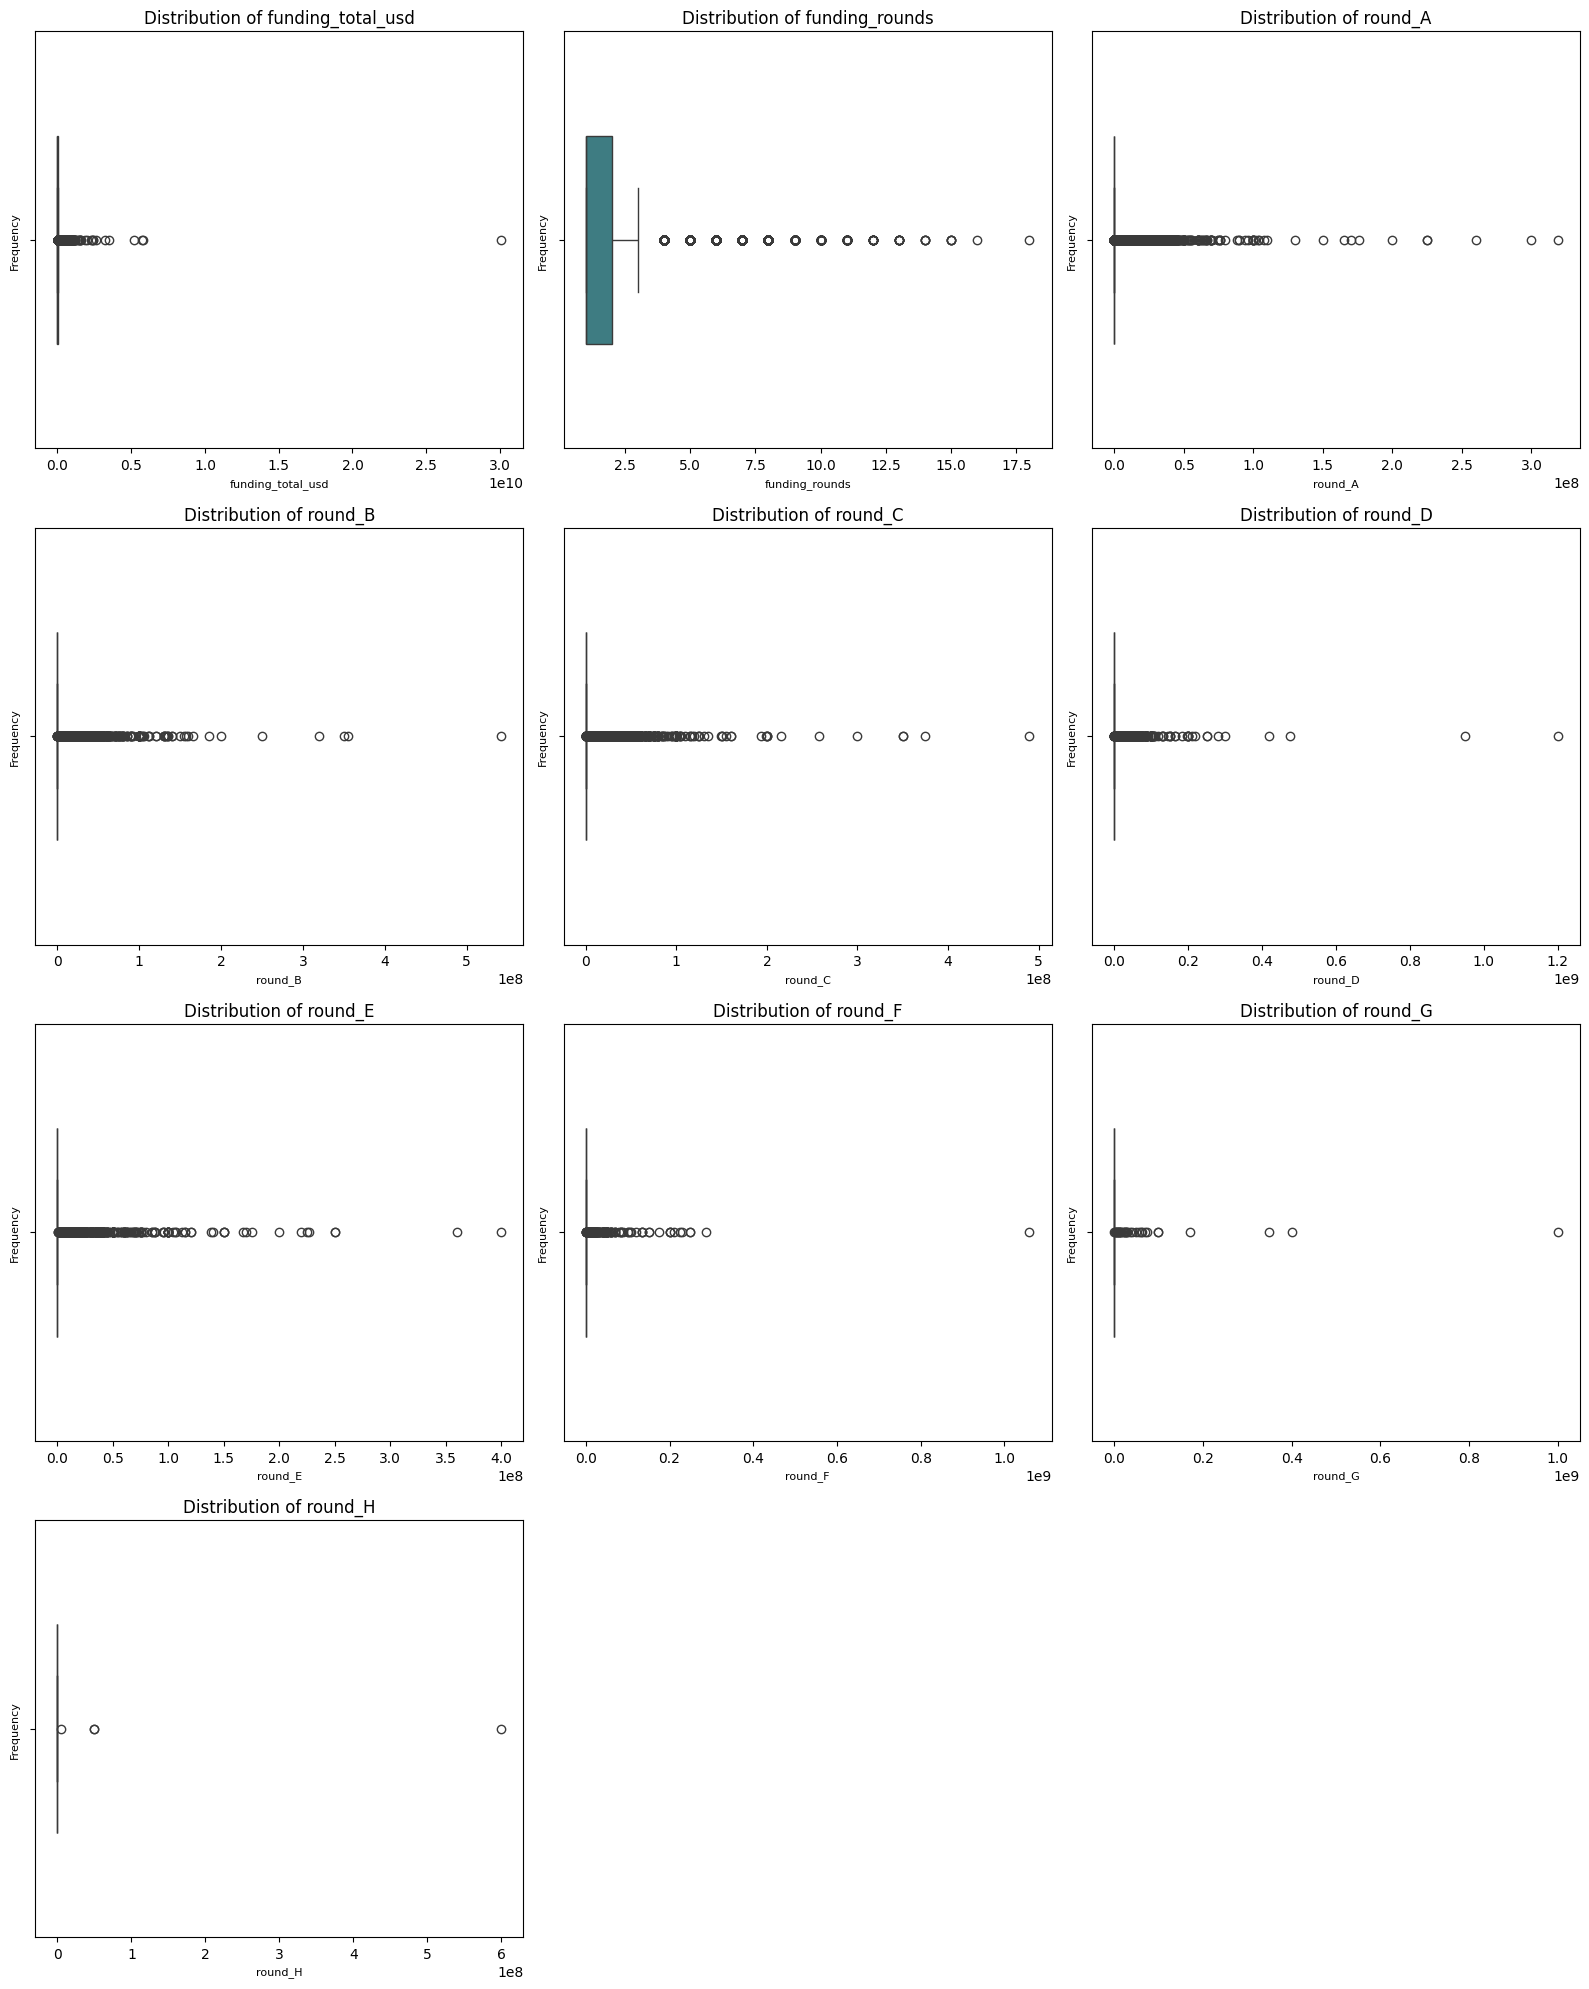

In [47]:
plt.figure(figsize = (16,20))
for i in range(1,11):
    plt.subplot(4,3,i)
    sns.boxplot(data=df,x=float_col_df.columns[i-1],palette='crest',width=0.5)
    plt.title(f'Distribution of {float_col_df.columns[i-1]}')
    plt.ylabel('Frequency',fontsize=8)
    plt.xlabel(f'{float_col_df.columns[i-1]}',fontsize = 8)
    
plt.tight_layout()
plt.show()

Despite the presence of outliers, they have not been removed as they represent significant variations in funding amounts, which are critical for understanding funding patterns and trends.

##### Correlation between numerical columns

In [48]:
numerical_columns = df.select_dtypes(include='number').columns
numerical_columns

df_corr = df[numerical_columns].corr()
df_corr

,funding_total_usd,funding_rounds,founded_year,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
funding_total_usd,1.000000,0.110453,-0.056572,0.059831,0.103077,0.130950,0.126120,0.114354,0.091987,0.082803,0.069428
funding_rounds,0.110453,1.000000,-0.070499,0.165741,0.278799,0.298553,0.200274,0.203275,0.104723,0.059684,0.035165
founded_year,-0.056572,-0.070499,1.000000,-0.014784,-0.039170,-0.044138,-0.025986,-0.024622,-0.008781,-0.003085,-0.000822
round_A,0.059831,0.165741,-0.014784,1.000000,0.268166,0.120633,0.039898,0.047187,0.018403,0.001415,-0.000371
round_B,0.103077,0.278799,-0.039170,0.268166,1.000000,0.346012,0.121167,0.093949,0.042551,0.009809,0.004960
round_C,0.130950,0.298553,-0.044138,0.120633,0.346012,1.000000,0.343870,0.144107,0.053475,0.023298,0.011551
round_D,0.126120,0.200274,-0.025986,0.039898,0.121167,0.343870,1.000000,0.240910,0.122004,0.090611,0.069108
round_E,0.114354,0.203275,-0.024622,0.047187,0.093949,0.144107,0.240910,1.000000,0.366157,0.297437,0.303983
round_F,0.091987,0.104723,-0.008781,0.018403,0.042551,0.053475,0.122004,0.366157,1.000000,0.240141,0.153170
round_G,0.082803,0.059684,-0.003085,0.001415,0.009809,0.023298,0.090611,0.297437,0.240141,1.000000,0.856735


[]

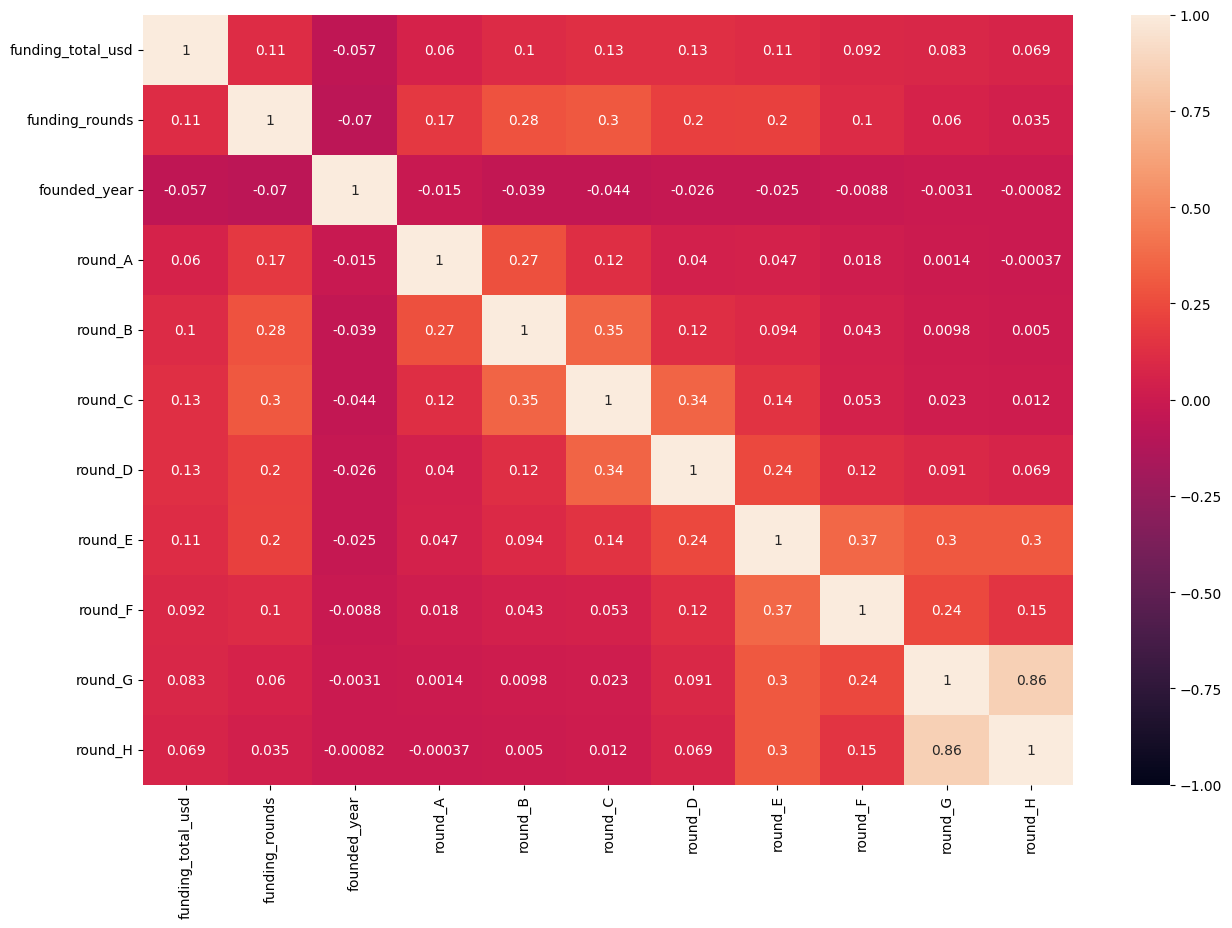

In [49]:
plt.figure(figsize = (15, 10))
sns.heatmap(data = df_corr, vmin = -1, vmax = 1, annot = True)
plt.plot()

### **Feature Engineering and Analysis**

In [50]:
df.head()

,name,category_list,market,funding_total_usd,status,country_code,region,funding_rounds,founded_at,founded_year,...,last_funding_at,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,funding_types
0,#waywire,|Entertainment|Politics|Social Media|News|,News,1750000.0,acquired,USA,New York City,1.0,2012-06-01,2012,...,2012-06-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,seed
1,&TV Communications,|Games|,Games,4000000.0,operating,USA,Los Angeles,2.0,2010-01-01,2010,...,2010-09-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,venture
2,'Rock' Your Paper,|Publishing|Education|,Publishing,40000.0,operating,EST,Tallinn,1.0,2012-10-26,2012,...,2012-08-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,seed
3,(In)Touch Network,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,1500000.0,operating,GBR,London,1.0,2011-04-01,2011,...,2011-04-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,seed
4,-R- Ranch and Mine,|Tourism|Entertainment|Games|,Tourism,60000.0,operating,USA,Dallas,2.0,2014-01-01,2014,...,2014-09-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,equity_crowdfunding


##### **1. Distribution of fundings across different categories, markets, and regions to identify sectors with higher investment potential.**

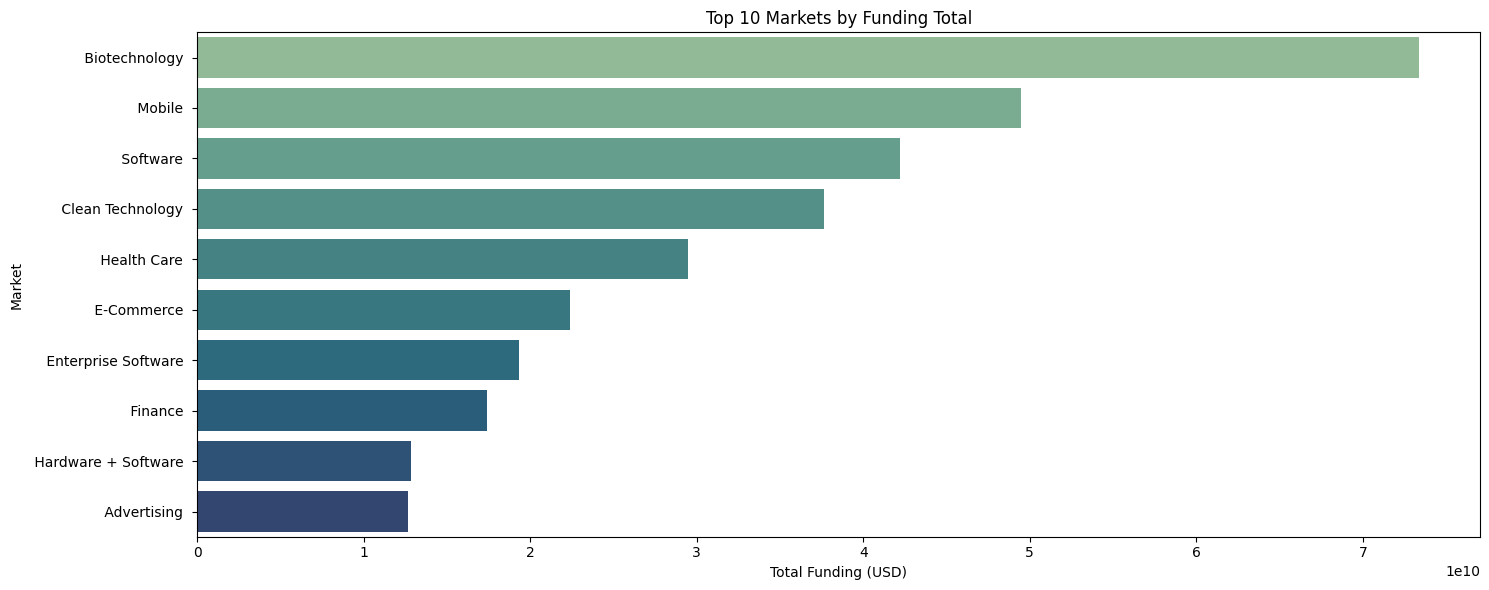

In [51]:
# Distribution of funding by market
df_market_filtered = df[df['market']!='Unknown']
market_funding = df_market_filtered.groupby('market')['funding_total_usd'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(15, 6))

sns.barplot(x=market_funding.values, y=market_funding.index, palette='crest')
plt.title('Top 10 Markets by Funding Total')
plt.xlabel('Total Funding (USD)')
plt.ylabel('Market')
plt.tight_layout()
plt.show()

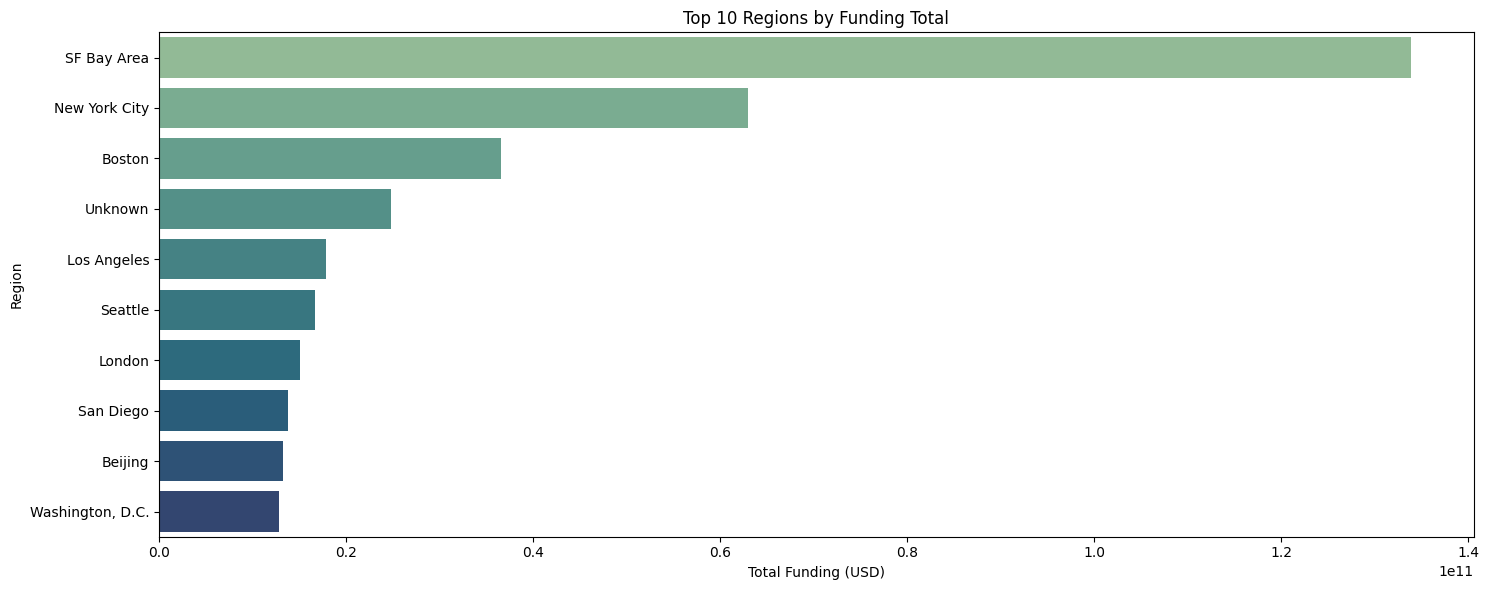

In [52]:
#Distribution of funding by region
df_region_filtered = df[df['region']!='Unknown']
region_funding = df.groupby('region')['funding_total_usd'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(15,6))

sns.barplot(x=region_funding.values, y=region_funding.index, palette='crest')
plt.title('Top 10 Regions by Funding Total')
plt.xlabel('Total Funding (USD)')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

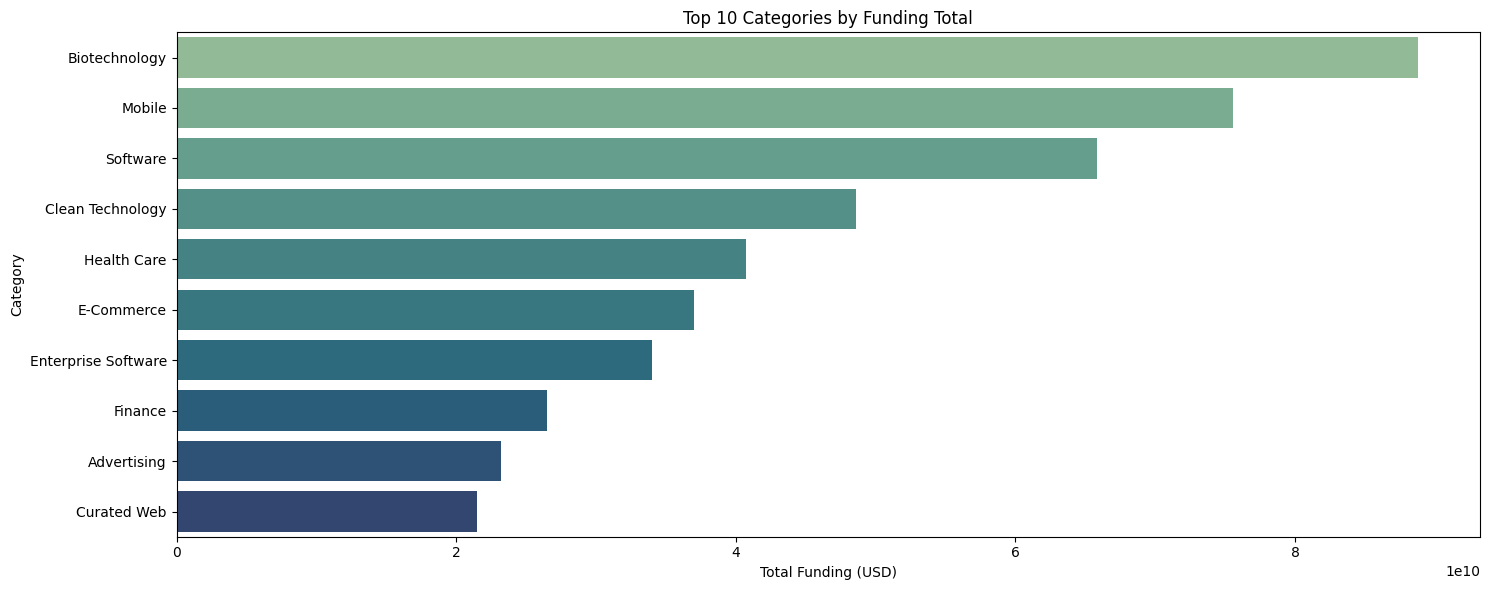

In [53]:
df['category_list_split'] = df['category_list'].str.strip('|').str.split('|')
df_exploded = df.explode('category_list_split')

df_exploded_filtered = df_exploded[df_exploded['category_list_split']!='Unknown']

category_funding = df_exploded_filtered.groupby('category_list_split')['funding_total_usd'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(15,6))
sns.barplot(x=category_funding.values, y=category_funding.index, palette='crest')
plt.title('Top 10 Categories by Funding Total')
plt.xlabel('Total Funding (USD)')
plt.ylabel('Category')
plt.tight_layout()
plt.show()


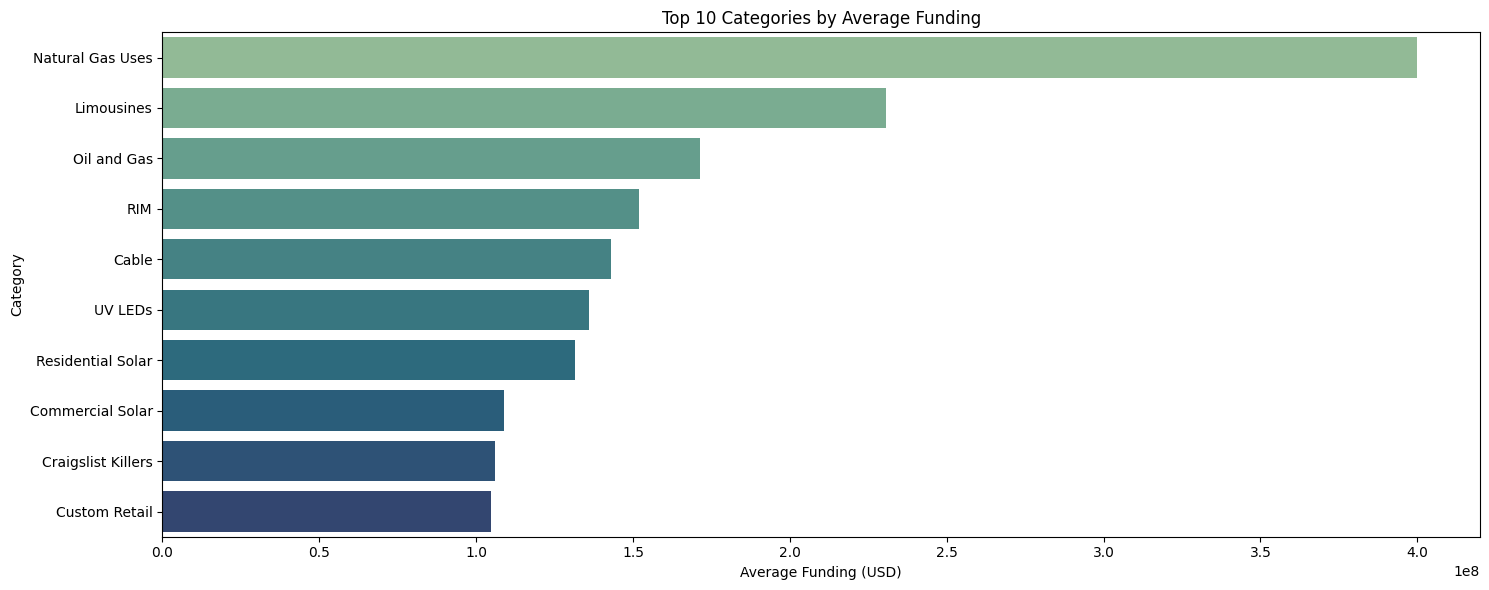

In [54]:
average_category_funding = df_exploded_filtered.groupby('category_list_split')['funding_total_usd'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(15,6))
sns.barplot(x=average_category_funding.values, y=average_category_funding.index, palette='crest')
plt.title('Top 10 Categories by Average Funding')
plt.xlabel('Average Funding (USD)')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

##### **2. Distribution of funding rounds for each funding types**

In [55]:
df['funding_types'] = df['funding_types'].astype('object')

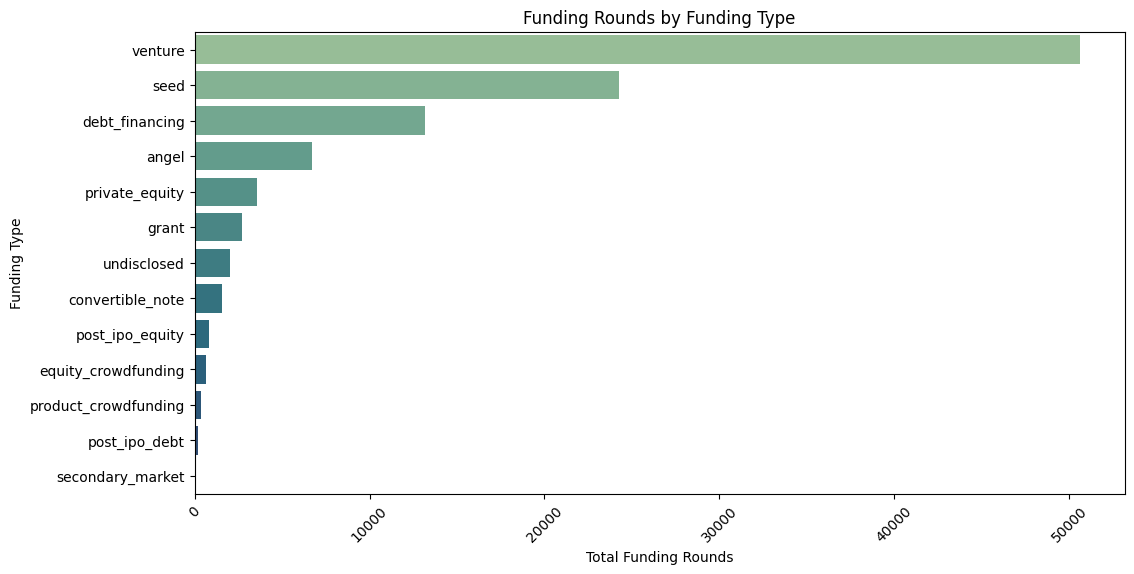

In [56]:
df['funding_types_split'] = df['funding_types'].str.strip(', ').str.split(', ')
df_exploded_ft = df.explode('funding_types_split')

df_exploded_ft_filtered = df_exploded_ft[df_exploded_ft['funding_types_split']!='Unknown']
funding_rounds_by_type = df_exploded_ft_filtered.groupby('funding_types_split')['funding_rounds'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(y=funding_rounds_by_type.index, x=funding_rounds_by_type.values, palette='crest')
plt.title('Funding Rounds by Funding Type')
plt.ylabel('Funding Type')
plt.xlabel('Total Funding Rounds')
plt.xticks(rotation=45)
plt.show()

##### **3. Distribution of funding rounds by market in each funding types**

                     market funding_types_split  funding_rounds
265          Biotechnology              venture          6579.0
2727              Software              venture          5295.0
255          Biotechnology       debt_financing          2541.0
1311           Health Care              venture          2234.0
1836                Mobile              venture          2160.0
1001   Enterprise Software              venture          1959.0
2725              Software                 seed          1721.0
411       Clean Technology              venture          1685.0
866             E-Commerce              venture          1625.0
1299   Hardware + Software              venture          1439.0


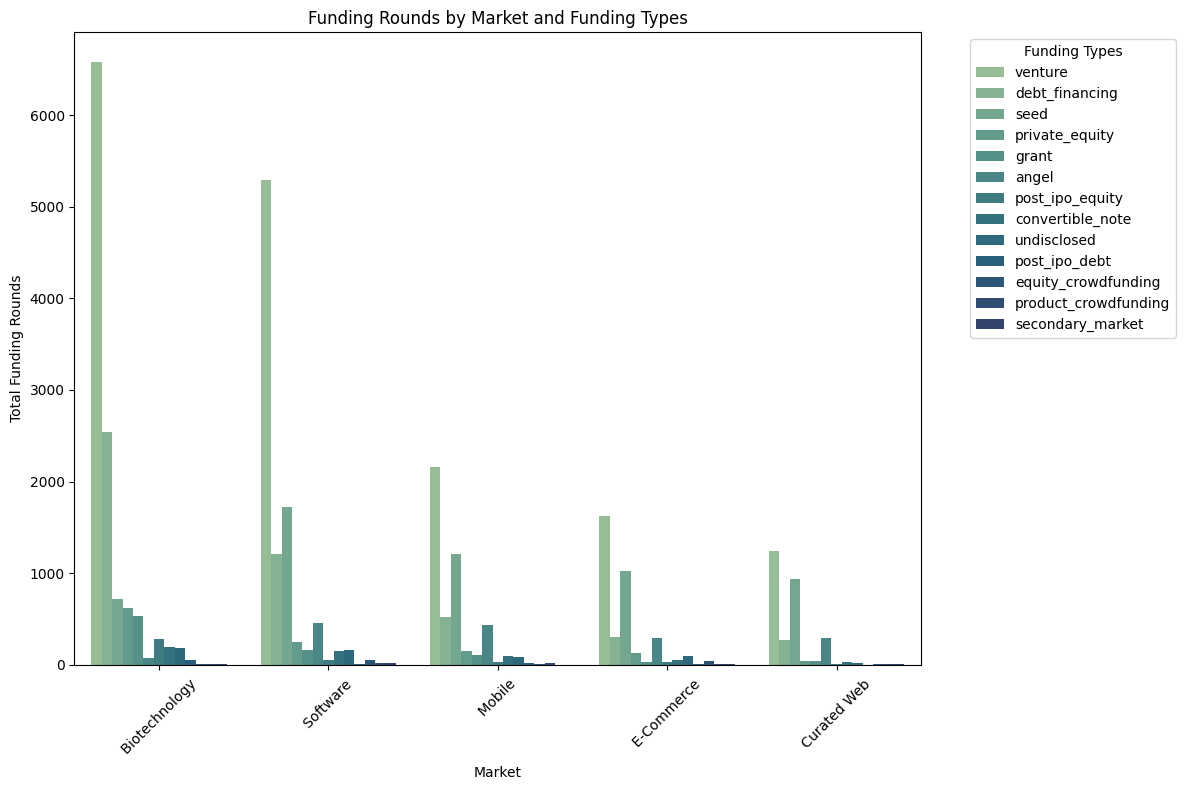

In [57]:
filtered_df = df_exploded_ft_filtered[df_exploded_ft_filtered['market']!='Unknown']

funding_rounds_relation = (
    filtered_df.groupby(['market', 'funding_types_split'])['funding_rounds']
    .sum()
    .reset_index()
    .sort_values(by='funding_rounds', ascending=False)
)

# Display top rows for insights
print(funding_rounds_relation.head(10))

# Optional: Visualization (Top 10 markets with funding type contributions)
top_markets = funding_rounds_relation['market'].value_counts().head(5).index
filtered_data = funding_rounds_relation[funding_rounds_relation['market'].isin(top_markets)]

plt.figure(figsize=(12,8))
sns.barplot(
    data=filtered_data, 
    x='market', 
    y='funding_rounds', 
    hue='funding_types_split', 
    palette='crest'
)
plt.title('Funding Rounds by Market and Funding Types')
plt.xlabel('Market')
plt.ylabel('Total Funding Rounds')
plt.xticks(rotation=45)
plt.legend(title='Funding Types', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##### **4. Distribution of total funding over the funding years**

Correlation coefficient: -0.06, p-value: 2.47e-36


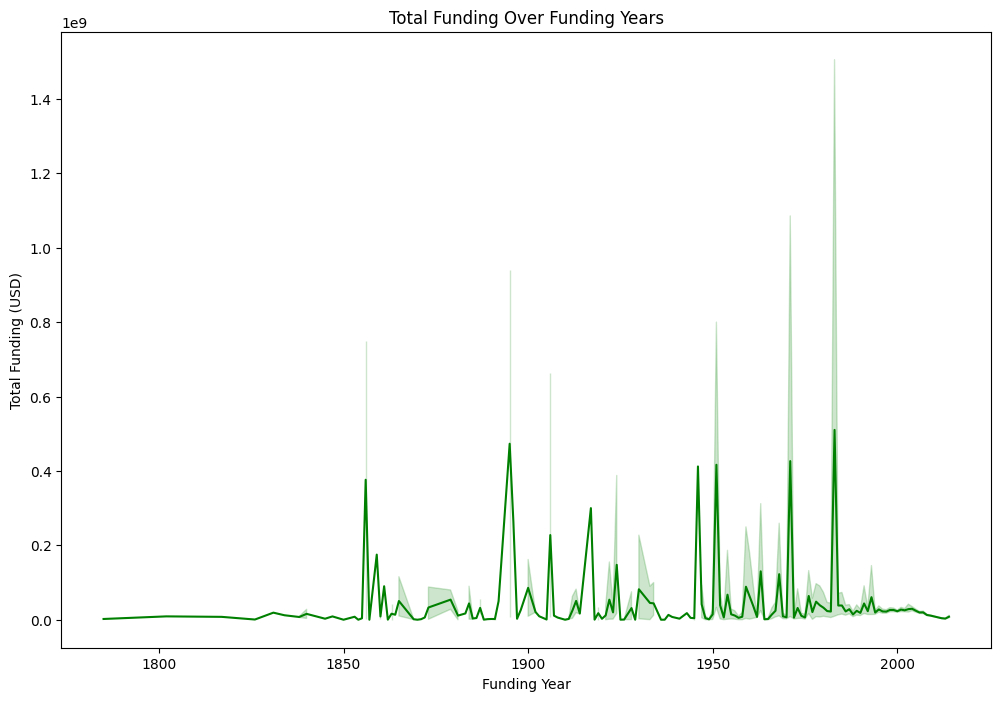

In [58]:
# Calculate correlation
correlation, p_value = pearsonr(df['funding_total_usd'], df['founded_year'])
print(f"Correlation coefficient: {correlation:.2f}, p-value: {p_value:.2e}")

plt.figure(figsize=(12, 8))
sns.lineplot(x='founded_year', y='funding_total_usd', data=df, color='green')
plt.title('Total Funding Over Funding Years')
plt.xlabel('Funding Year')
plt.ylabel('Total Funding (USD)')
plt.show()

#### Insights
1. **Funding Trends Before 1900**:
   - The graph shows a relatively flat trend in funding before the mid-1800s, with minimal activity. This is likely because formalized funding mechanisms, such as venture capital, institutional funding, or organized public market investments, were not prevalent during this time.
   - The first noticeable spike in funding around the mid-1800s might correspond to the **Second Industrial Revolution** (circa 1850-1900), where significant advancements in industries like railroads, steel, and telegraph systems attracted substantial investments.

2. **Surges in the Early 20th Century**:
   - There are notable funding spikes during the early 1900s, possibly tied to periods of economic growth and major technological advancements. For instance:
     - The **early 20th century** saw rapid industrial expansion, electrification, and automotive developments (e.g., the rise of Ford Motor Company).
     - The **post-World War I period** (late 1910s to 1920s) experienced a surge in economic activity, which may explain some peaks. This era, known as the "Roaring Twenties," was characterized by increased consumerism, technological innovations, and industrial growth.

3. **Mid-20th Century Funding Peaks**:
   - Significant funding spikes are also visible around the mid-1900s. These could align with the post-**World War II economic boom** in the late 1940s and 1950s, when there was increased investment in infrastructure, manufacturing, technology, and defense.
   - Another substantial peak may correlate with the **Space Race era** (1957-1969), where massive funding was directed towards aerospace, defense, and related technologies.

4. **Late 20th Century to Early 21st Century**:
   - The chart shows spikes in funding in the late 20th century, possibly related to the **dot-com bubble** (1995-2000). This period witnessed a surge in venture capital investments in internet-based companies.
   - However, after 2000, the graph indicates a decline or stabilization in funding. This could reflect the aftermath of the **dot-com crash** in 2000-2001, followed by more cautious investment patterns in the early 2000s.

5. **Post-2000 Flattening**:
   - The plateau or decline in recent funding may indicate increased market saturation or shifts in investment strategies. Alternatively, it could reflect data limitations, where funding information may not be fully updated beyond a certain period in the dataset.

##### **5. Year-over-Year Growth in Funding for Top Markets**

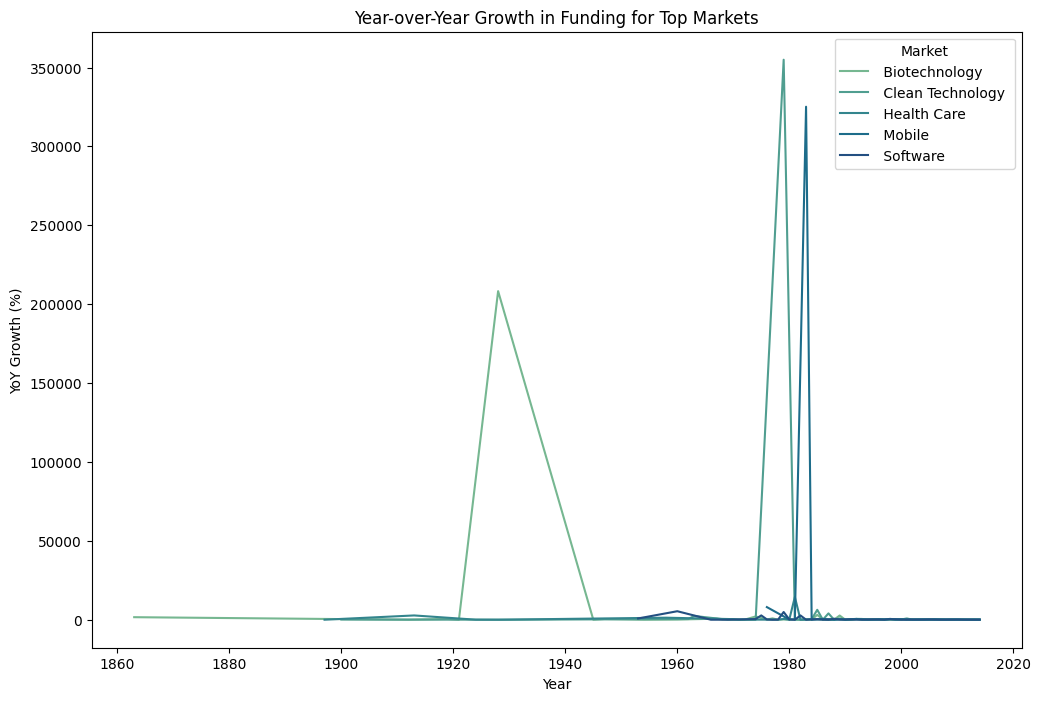

In [59]:
market_year_funding = filtered_df.groupby(['market','founded_year'])['funding_total_usd'].sum().reset_index()

market_year_funding['YoY_growth'] = market_year_funding.groupby('market')['funding_total_usd'].pct_change()*100

market_funding_filtered = market_year_funding.dropna(subset=['YoY_growth'])

# Visualize the YoY growth for top markets
top_markets = market_funding_filtered.groupby('market')['funding_total_usd'].sum().nlargest(5).index
top_market_funding = market_funding_filtered[market_funding_filtered['market'].isin(top_markets)]


plt.figure(figsize=(12, 8))
sns.lineplot(data=top_market_funding, x='founded_year', y='YoY_growth', hue='market', palette='crest')
plt.title('Year-over-Year Growth in Funding for Top Markets')
plt.xlabel('Year')
plt.ylabel('YoY Growth (%)')
plt.legend(title='Market')
#plt.grid(True)
plt.show()

#### Insights
1. **Significant Fluctuations in Year-over-Year (YoY) Growth Rates**
   - **Positive Surges**: There are some extreme positive YoY growth rates, such as:
     - In **1863**, a biotechnology company had a substantial funding amount of **$43.5 million** and a remarkable YoY growth rate of **1508.13%**.
     - In **1928**, another biotechnology entity shows funding of **$100 million** with an exceptionally high YoY growth of **208,233.33%**.
   - These extreme positive growth rates suggest periods where significant investments were made, possibly driven by major advancements or breakthroughs in the respective markets. For example:
     - **Biotechnology**: Investment spikes could be due to critical discoveries or innovations, such as vaccines, medical treatments, or technological breakthroughs.
   - **Negative Trends**: In contrast, there are instances of steep declines, such as:
     - In **1912**, biotechnology funding dropped by **-91.95%**, and in **1921**, it plummeted by **-99.73%**.
     - For **software**, after 2010, there appears to be a consistent decline in funding with YoY reductions from 2011 onwards (e.g., **-21.86%** in 2011, **-28.74%** in 2012).

   These negative trends could indicate:
   - **Market Saturation**: For the software industry, declining YoY growth after 2010 might suggest market saturation or a shift in investment focus towards newer technologies.
   - **Economic Downturns**: Sharp decreases in funding could also align with economic crises or industry-specific setbacks.

2. **Historical Investment Patterns in Biotechnology**
   - Biotechnology shows some of the earliest investments, with companies founded as far back as the **mid-1800s**.
   - Large spikes in funding during certain years (e.g., 1863, 1928) could be correlated with major scientific breakthroughs, possibly due to innovations like **antibiotics, vaccines**, or **genetic research**.
   - However, biotechnology also shows periods of extreme funding decline (e.g., 1912, 1921), which may correspond to economic downturns like the **Great Depression** or shifts in investment priorities.

3. **Modern Trends in the Software Industry**
   - The software industry experienced significant funding in the early 2010s:
     - A peak funding amount of approximately **$2.83 billion** in **2010**, followed by a decline in subsequent years.
   - The sharp decline in funding YoY growth from **2011 to 2014** could be attributed to the aftermath of the **dot-com bubble** or a shift in venture capital towards newer technology sectors like **AI, cloud computing, or fintech**.

4. **General Observations on Funding Trends by Market**
   - The data suggests that funding varies drastically across industries and time periods, likely influenced by:
     - **Technological advancements**: Certain industries, like biotechnology and software, see funding peaks when innovations emerge.
     - **Economic cycles**: Boom and bust cycles in funding can reflect broader economic conditions or investor sentiment.
     - **Regulatory or geopolitical factors**: Changes in government policies, wars, or economic crises can significantly impact funding, particularly in sectors like healthcare, defense, or software.

##### **7. Distribution of most common funding types in top markets**

                     market funding_types_split  count
265          Biotechnology              venture   3824
2727              Software              venture   3327
1836                Mobile              venture   1279
1311           Health Care              venture   1191
1001   Enterprise Software              venture   1070
411       Clean Technology              venture    990
866             E-Commerce              venture    980
1299   Hardware + Software              venture    914
673            Curated Web              venture    805
37             Advertising              venture    738
1205                 Games              venture    687
1335   Health and Wellness              venture    615
1108               Finance              venture    558
2556        Semiconductors              venture    514
2664          Social Media                 seed    492
1723         Manufacturing              venture    486
88               Analytics              venture    459
2532      

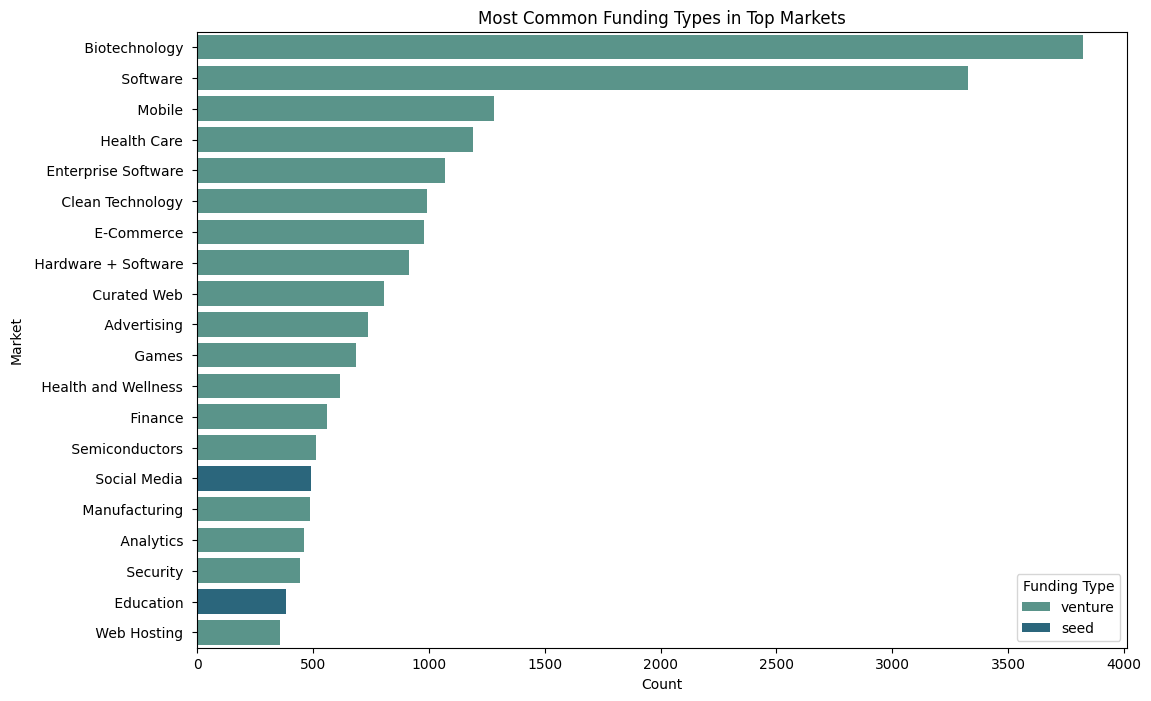

In [60]:
# Explode funding types
df_exploded_fts = filtered_df.copy()
df_exploded_fts['funding_types_split'] = df_exploded_fts['funding_types'].str.split(', ')
df_exploded_fts = df_exploded_fts.explode('funding_types_split')

# Group by sector (e.g., 'market') and funding type, count occurrences
sector_funding_type = (
    df_exploded_fts.groupby(['market', 'funding_types_split'])
    .size()
    .reset_index(name='count')
)

# Find the most common funding type for each market
most_common_funding_type = (
    sector_funding_type.loc[sector_funding_type.groupby('market')['count'].idxmax()]
    .sort_values(by='count', ascending=False)
)

# Display results
print(most_common_funding_type.head(20))

# Optional: Visualize top markets and their most common funding types
plt.figure(figsize=(12, 8))
sns.barplot(
    data=most_common_funding_type.head(20),
    x='count',
    y='market',
    hue='funding_types_split',
    dodge=False,
    palette='crest'
)
plt.title('Most Common Funding Types in Top Markets')
plt.xlabel('Count')
plt.ylabel('Market')
plt.legend(title='Funding Type')
plt.show()


##### **8. Distribution of startup count across top 10 regions**

              region  total_funding   avg_funding  startup_count
1047     West Sussex    541000000.0  5.410000e+08              1
147   Burleigh Heads    382106890.0  3.821069e+08              1
909     Spruce Grove    240000000.0  2.400000e+08              1
97           Bermuda    751666000.0  1.879165e+08              4
558     Lincolnshire    167400000.0  1.674000e+08              1
221        Coleraine    481947987.0  1.606493e+08              3
584           Lyngby    397315400.0  1.324385e+08              3
825          Rostock    216635975.0  1.083180e+08              2
104         Billings     96700000.0  9.670000e+07              1
428          Homburg     91430342.0  9.143034e+07              1


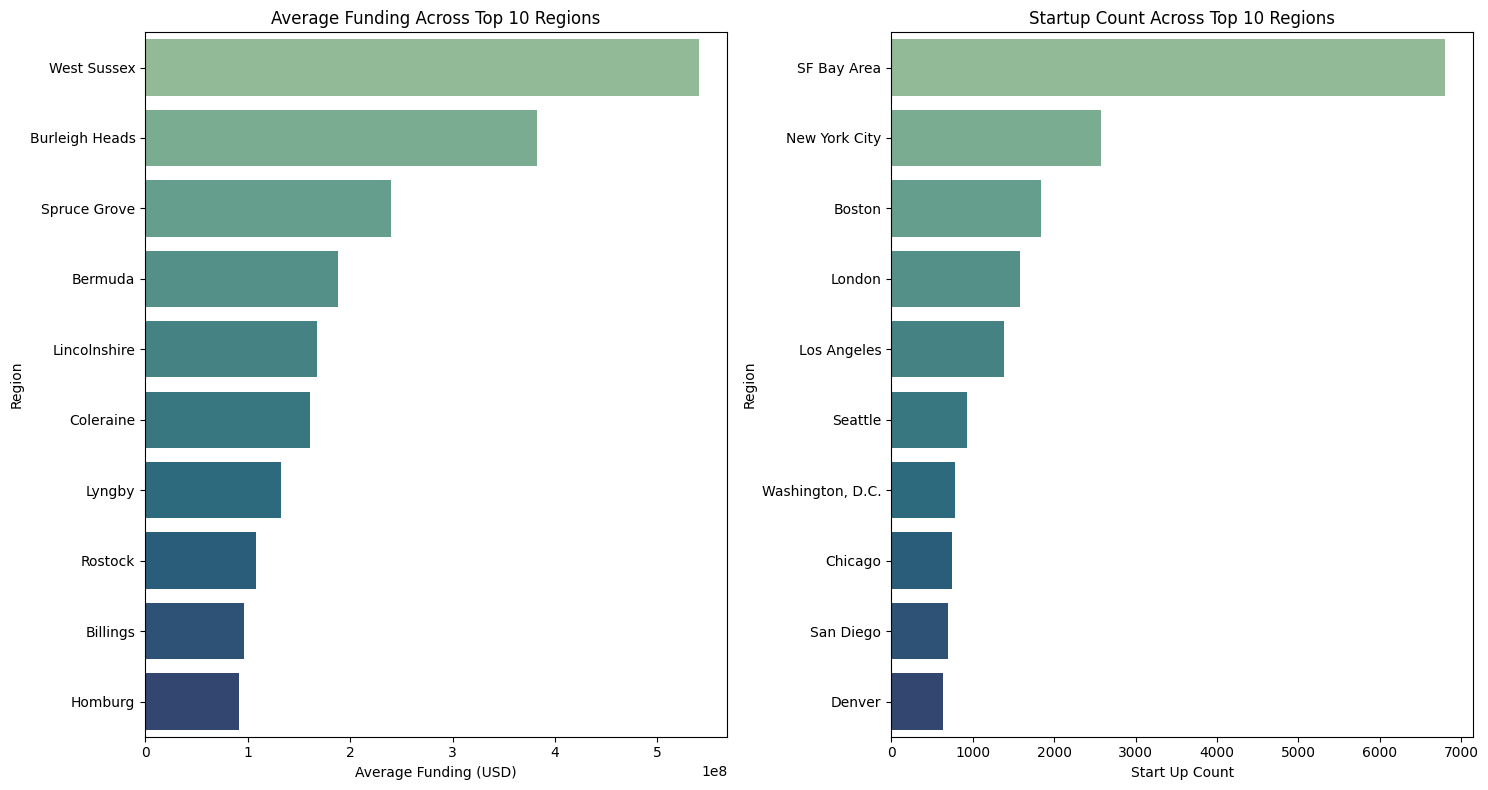

In [61]:
#Group by region and calculate total and average funding
region_funding = (
    df_region_filtered.groupby('region')
    .agg(total_funding=('funding_total_usd', 'sum'), 
         avg_funding=('funding_total_usd', 'mean'), 
         startup_count=('name', 'count'))
    .reset_index()
    .sort_values(by='avg_funding', ascending=False)
)

startup_count_df = region_funding.sort_values(by='startup_count',ascending=False)
# Display top regions by total funding
print(region_funding.head(10))

# Visualize total funding by region (Top 10)
plt.figure(figsize=(15, 8))
plt.subplot(1,2,1)
sns.barplot(
    data=region_funding.head(10), 
    x='avg_funding', 
    y='region', 
    palette='crest'
)
plt.title('Average Funding Across Top 10 Regions')
plt.xlabel('Average Funding (USD)')
plt.ylabel('Region')

plt.subplot(1,2,2)
sns.barplot(
    data=startup_count_df.head(10), 
    x='startup_count', 
    y='region', 
    palette='crest'
)
plt.title('Startup Count Across Top 10 Regions')
plt.xlabel('Start Up Count')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

##### **9. Average Funding in Niche vs. Broad Markets**

  market_type  total_funding   avg_funding  startup_count
0       Broad   6.498294e+11  1.317097e+07          49338
1       Niche   1.104288e+09  1.187406e+07             93


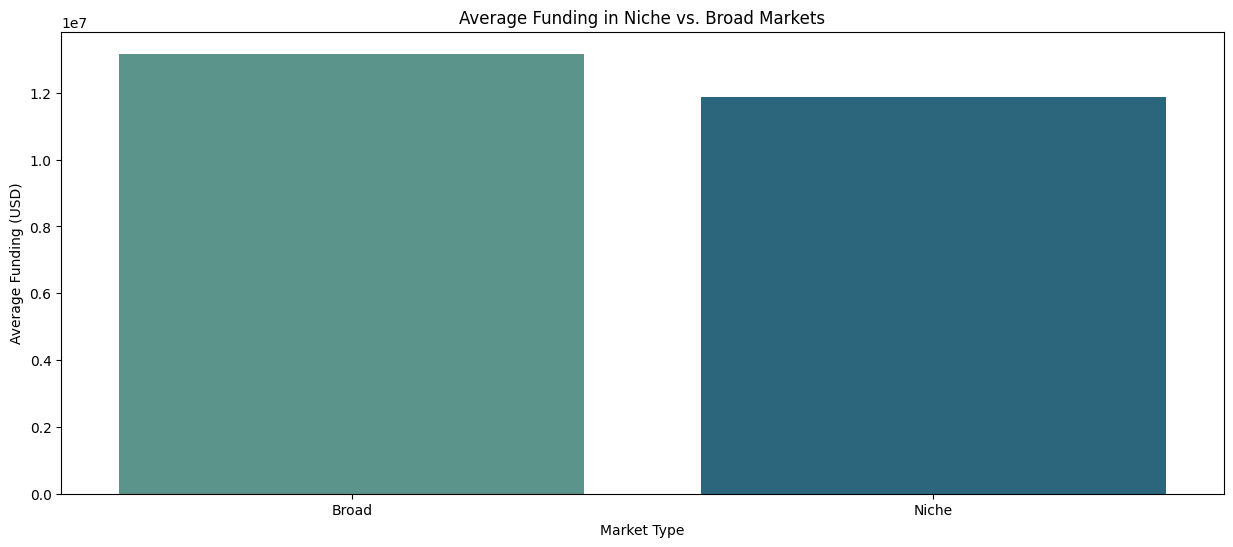

In [62]:
# Step 1: Calculate the number of startups in each market
market_counts = df.groupby('market').size().reset_index(name='startup_count')

# Step 2: Define niche and broad markets
threshold = market_counts['startup_count'].quantile(0.1)  # Top 10% smallest
niche_markets = market_counts[market_counts['startup_count'] <= threshold]['market']
broad_markets = market_counts[market_counts['startup_count'] > threshold]['market']

# Step 3: Filter niche and broad market startups
df['market_type'] = df['market'].apply(
    lambda x: 'Niche' if x in niche_markets.values else 'Broad'
)

# Step 4: Calculate average funding for niche and broad markets
funding_by_market_type = df.groupby('market_type').agg(
    total_funding=('funding_total_usd', 'sum'),
    avg_funding=('funding_total_usd', 'mean'),
    startup_count=('name', 'count')
).reset_index()

print(funding_by_market_type)

# Step 5: Visualize the comparison
plt.figure(figsize=(15, 6))
sns.barplot(
    data=funding_by_market_type, 
    x='market_type', 
    y='avg_funding', 
    palette='crest'
)
plt.title('Average Funding in Niche vs. Broad Markets')
plt.xlabel('Market Type')
plt.ylabel('Average Funding (USD)')
plt.show()


##### **10. Distribution of top 10 average annual fundings across various market**

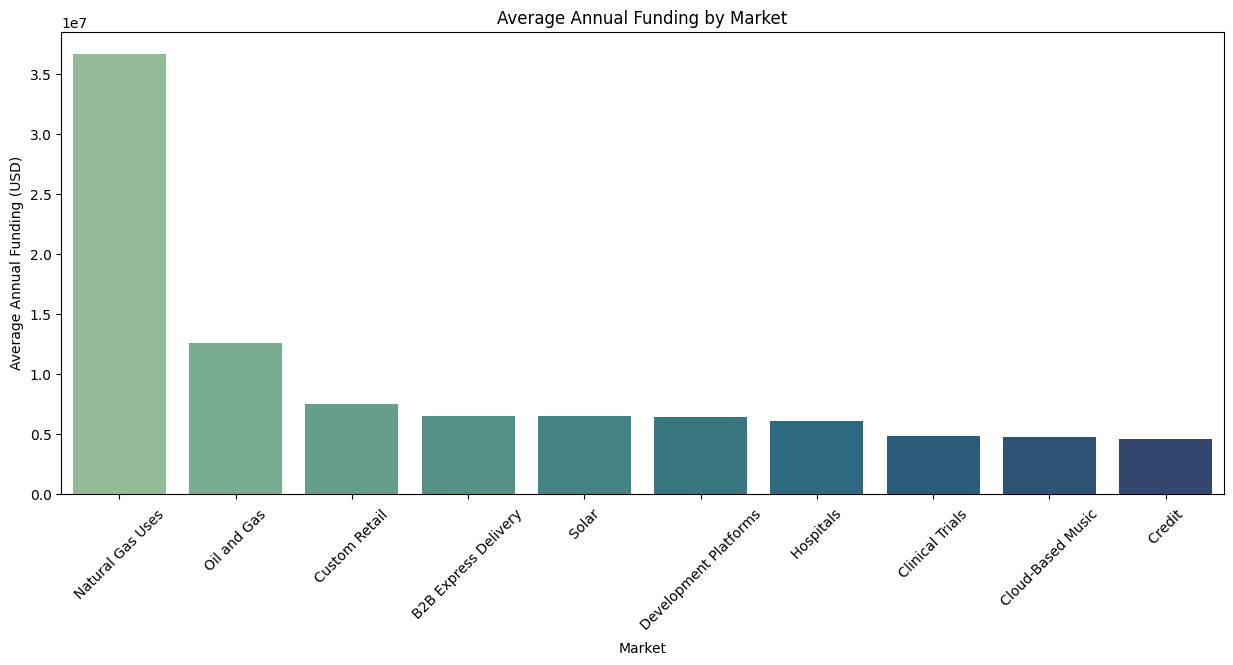

In [63]:

# Calculate years since founding
df['years_since_founding'] = (pd.Timestamp.now() - df['founded_at']).dt.days / 365.25

# Annualized funding
df['annual_funding'] = df['funding_total_usd'] / df['years_since_founding']

# Time between funding rounds (average for startups)
df['time_between_rounds'] = (df['last_funding_at'] - df['founded_at']).dt.days / df['funding_rounds']

# Remove invalid or extreme values (e.g., NaN, division by zero)
df = df[df['years_since_founding'] > 0]
df = df[df['funding_rounds'] > 0]

# Aggregate by market or category
funding_velocity_by_market = df.groupby('market').agg(
    avg_annual_funding=('annual_funding', 'mean'),
    avg_time_between_rounds=('time_between_rounds', 'mean'),
    total_funding=('funding_total_usd', 'sum')
).sort_values(by='avg_annual_funding', ascending=False).head(10)

plt.figure(figsize=(15,6))
sns.barplot(
    data=funding_velocity_by_market.reset_index(), 
    x='market', 
    y='avg_annual_funding', 
    palette='crest'
)
plt.title('Average Annual Funding by Market')
plt.xlabel('Market')
plt.ylabel('Average Annual Funding (USD)')
plt.xticks(rotation=45)
plt.show()

##### **11. Average Funding Amount Across Different Funding Rounds**

In [64]:
round_columns = ['round_A', 'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H']

# Calculate growth for each round
for i in range(1, len(round_columns)):
    current_round = round_columns[i]
    previous_round = round_columns[i - 1]
    df[f'{previous_round}_to_{current_round}_growth'] = (
        (df[current_round] - df[previous_round]) / df[previous_round].replace(0, np.nan)) * 100

# View Growth Metrics
growth_columns = [col for col in df.columns if '_to_' in col]
df[df[growth_columns]['round_A_to_round_B_growth']>0][growth_columns].head()

,round_A_to_round_B_growth,round_B_to_round_C_growth,round_C_to_round_D_growth,round_D_to_round_E_growth,round_E_to_round_F_growth,round_F_to_round_G_growth,round_G_to_round_H_growth
51,129.032258,-38.380282,-100.000000,NaN,NaN,NaN,NaN
112,40.000000,146.031746,86.935161,-100.0,NaN,NaN,NaN
137,100.000000,-100.000000,NaN,NaN,NaN,NaN,NaN
138,150.000000,-100.000000,NaN,NaN,NaN,NaN,NaN
160,100.000000,62.500000,-4.307692,-100.0,NaN,NaN,NaN


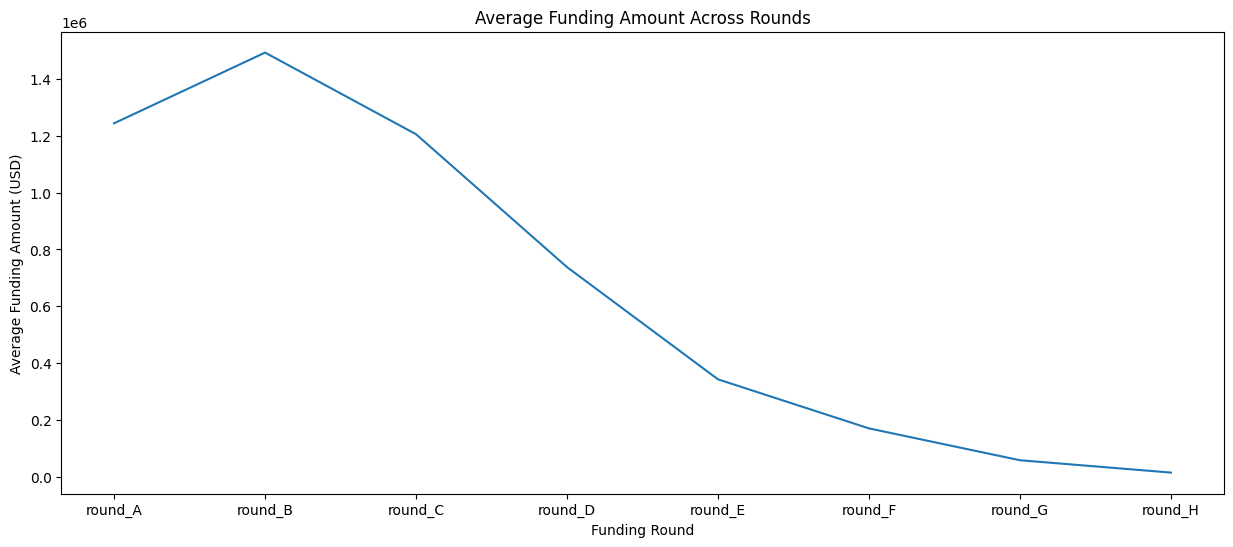

In [65]:
df_mean_rounds = df[round_columns].mean()

plt.figure(figsize=(15, 6))
sns.lineplot(x=round_columns, y=df_mean_rounds, palette='crest')
plt.title("Average Funding Amount Across Rounds")
plt.xlabel("Funding Round")
plt.ylabel("Average Funding Amount (USD)")
plt.show()

#### **Insights**
1. **Early Stage Funding**: Startups generally receive higher funding in earlier rounds (like `round_A` and `round_B`). This may indicate that investors are more willing to invest significant amounts during early-stage rounds when the company shows potential for growth.
2. **Diminishing Returns in Later Rounds**: As the rounds progress beyond `round_B`, the funding decreases steadily, suggesting that later rounds might be attracting less interest from investors, possibly due to increased risk, slower growth, or diminishing confidence in the startup's scalability.
3. **Potential Shift in Investment Strategy**: Investors may be cautious in later rounds, focusing their funds on newer ventures instead of continuously funding later rounds of existing startups.

These trends are common in startup funding cycles where companies may initially raise significant capital but find it harder to secure large sums in later rounds unless they demonstrate exponential growth or have achieved significant milestones.

#### **Economic Impact Analysis**

In [66]:
economy_df= pd.read_csv('Dataset/economy.csv')
economy_df

,Country Name,Country Code,Year,GDP
0,Aruba,ABW,1986,4.055866e+08
1,Aruba,ABW,1987,4.877095e+08
2,Aruba,ABW,1988,5.966480e+08
3,Aruba,ABW,1989,6.955307e+08
4,Aruba,ABW,1990,7.648045e+08
...,...,...,...,...
13974,Zimbabwe,ZWE,2019,2.183223e+10
13975,Zimbabwe,ZWE,2020,2.150970e+10
13976,Zimbabwe,ZWE,2021,2.837124e+10
13977,Zimbabwe,ZWE,2022,2.736663e+10


In [102]:
economy_df.columns

Index(['Country Name', 'Country Code', 'Year', 'GDP'], dtype='object')

In [ ]:
merged_data = pd.merge(df, economy_df, left_on=['founded_year','country_code'],
                        right_on=['Year','Country Code'], how='inner')

In [68]:
merged_data.head()

,name,category_list,market,funding_total_usd,status,country_code,region,funding_rounds,founded_at,founded_year,...,round_B_to_round_C_growth,round_C_to_round_D_growth,round_D_to_round_E_growth,round_E_to_round_F_growth,round_F_to_round_G_growth,round_G_to_round_H_growth,Country Name,Country Code,Year,GDP
0,#waywire,|Entertainment|Politics|Social Media|News|,News,1750000.0,acquired,USA,New York City,1.0,2012-06-01,2012,...,NaN,NaN,NaN,NaN,NaN,NaN,United States,USA,2012,1.625400e+13
1,10X Technologies,|Biotechnology|,Biotechnology,3000000.0,operating,USA,SF Bay Area,1.0,2012-01-01,2012,...,NaN,NaN,NaN,NaN,NaN,NaN,United States,USA,2012,1.625400e+13
2,12Society,|E-Commerce|,E-Commerce,0.0,acquired,USA,Los Angeles,1.0,2012-01-01,2012,...,NaN,NaN,NaN,NaN,NaN,NaN,United States,USA,2012,1.625400e+13
3,1st Choice Lawn Care,|Unknown|,Unknown,0.0,operating,USA,Shreveport,1.0,2012-08-01,2012,...,NaN,NaN,NaN,NaN,NaN,NaN,United States,USA,2012,1.625400e+13
4,247 Techies,|Hardware + Software|,Hardware + Software,600000.0,operating,USA,New York City,1.0,2012-01-01,2012,...,NaN,NaN,NaN,NaN,NaN,NaN,United States,USA,2012,1.625400e+13


In [69]:
correlation_matrix = merged_data[['funding_total_usd', 'GDP']].corr()
correlation_matrix

,funding_total_usd,GDP
funding_total_usd,1.000000,-0.006447
GDP,-0.006447,1.000000


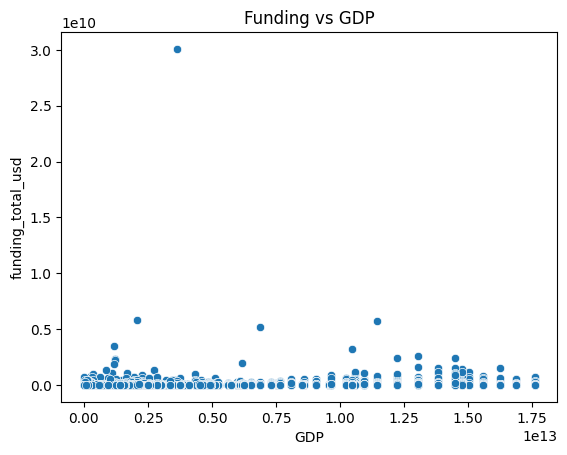

In [70]:
sns.scatterplot(x="GDP", y="funding_total_usd", data=merged_data)
plt.title("Funding vs GDP")
plt.show()

### Insights:

1. **Weak Correlation Between GDP and Funding:**  
   - The correlation coefficient (-0.006) indicates an almost negligible relationship between GDP and total funding.
   - This suggests that higher GDP does not necessarily result in more startup funding in a given country.

2. **Funding Distribution is Independent of Economic Size:**  
   - Even countries with smaller GDPs can attract significant startup funding, possibly due to a strong startup ecosystem, innovation hubs, or favorable policies.

3. **Outliers in Funding:**  
   - Some extreme funding values (outliers) exist, especially in countries with lower GDP. These could indicate unique cases where large investments were made in specific startups or industries.

4. **Localized Factors Are More Influential:**  
   - Factors such as investor behavior, sector focus, regional support, and startup performance likely drive funding decisions more than a country's overall GDP.


### Recommendations:

1. **Startups in Low-GDP Regions:**  
   - Focus on building strong ecosystems and leveraging niche sectors to attract funding, even in smaller economies.

2. **Investors:**  
   - Identify high-potential markets independent of GDP. Consider factors like innovation hubs, talent, and sector growth instead of just economic size.

3. **Further Analysis:**  
   - Investigate outliers to understand why significant funding occurred in specific instances and whether replicable conditions exist.

---

### **5. Hypothesis Testing**

First let's write all the functions that satisfies the assumptions of performing a hypothesis testing

Test for Normality

In [71]:
seed(1)

def test_for_normality(df,d):
    print("Applying Shapiro-Wilk test for normality on column:",d)
    print("\n Ho: The sample follows normal distribution \n Ha: The sample does not follow normal distribution")
    print("\n alpha=0.05")
    
    test_stat, p_value = shapiro(df[d])

    print('\n p-value for',d,'is:', p_value)

    if p_value < 0.05:
        print('\n Rejecting the null hypothesis: The sample does not follow normal distribution')
    else:
        print('\n Fail to reject the null hypothesis: The sample follows normal distribution')

Test for Homogeneity (variance)

In [72]:
def test_for_homogeneity(df1, first_col,df2,second_col):
    print("Applying Levene's test for homogenity of groups between:",first_col,"and",second_col)
    print("\n Ho: Groups have equal variances \n Ha: Groups have different variances")
    print("\n alpha=0.05")
    
    test_stat, p_value = levene(df1[first_col],df2[second_col])
    
    print('\n p-value is:', p_value)

    if p_value < 0.05:
        print('\n Rejecting the null hypothesis: The groups have a significant difference between the variances')
    else:
        print('\n Accepting the null hypothesis: The groups do not have a significant difference between the variances')

In [73]:
def test_for_homogeneity_groups(group):
    print("Applying Levene's test for homogenity of groups")
    print("\n Ho: Groups have equal variances \n Ha: Groups have different variances")
    print("\n alpha=0.05")
    
    test_stat, p_value = levene(*group)
    
    print('\n p-value is:', p_value)

    if p_value < 0.05:
        print('\n Rejecting the null hypothesis: The groups have a significant difference between the variances')
    else:
        print('\n Accepting the null hypothesis: The groups do not have a significant difference between the variances')

Test for normality - Visual

In [74]:
def test_for_normality_visual(df,first_col,second_col):
    print("Distribution check using QQ Plot")
    plt.figure(figsize = (15, 6))
    plt.subplot(1, 2, 1)
    plt.suptitle("QQ plots for "+first_col+" and "+second_col)
    stats.probplot(df[first_col], plot = plt, dist = 'norm')
    plt.title("QQ plots for "+first_col)
    plt.subplot(1, 2, 2)
    stats.probplot(df[second_col], plot = plt, dist = 'norm')
    plt.title("QQ plots for "+second_col)
    plt.plot()

Test for correlation

In [75]:
def test_for_correlation(df,first_col,second_col):
    x=df[first_col]
    y=df[second_col]
    # x=df[first_col]
    # y=df[second_col]
    print("Applying test for correlation between:",first_col,'and',second_col)
    print("\n Ho: No correlation exist between the two  \n Ha: Significant correlation exist between the two")
    print("\n alpha=0.05")
    test_stat, p_value = spearmanr(x,y)
    print('\n P-value :',p_value)
    if p_value < 0.05:
        print("\n Rejecting the null hypothesis: There is a significant correlation between",x.name,'and',y.name)
    else:
        print("\n Accepting the null hypothesis: No significant correlation between",x.name,'and',y.name)

    1. Relationship between founded year and funding total

In [76]:
sampled_df = df.sample(5000)

Applying Shapiro-Wilk test for normality on column: founded_year

 Ho: The sample follows normal distribution 
 Ha: The sample does not follow normal distribution

 alpha=0.05

 p-value for founded_year is: 3.969908725472577e-80

 Rejecting the null hypothesis: The sample does not follow normal distribution
----------------------------------------------------------------------------------------------------
Applying Shapiro-Wilk test for normality on column: funding_total_usd

 Ho: The sample follows normal distribution 
 Ha: The sample does not follow normal distribution

 alpha=0.05

 p-value for funding_total_usd is: 2.341127011639831e-93

 Rejecting the null hypothesis: The sample does not follow normal distribution
----------------------------------------------------------------------------------------------------
Applying Levene's test for homogenity of groups between: founded_year and funding_total_usd

 Ho: Groups have equal variances 
 Ha: Groups have different variances

 alph

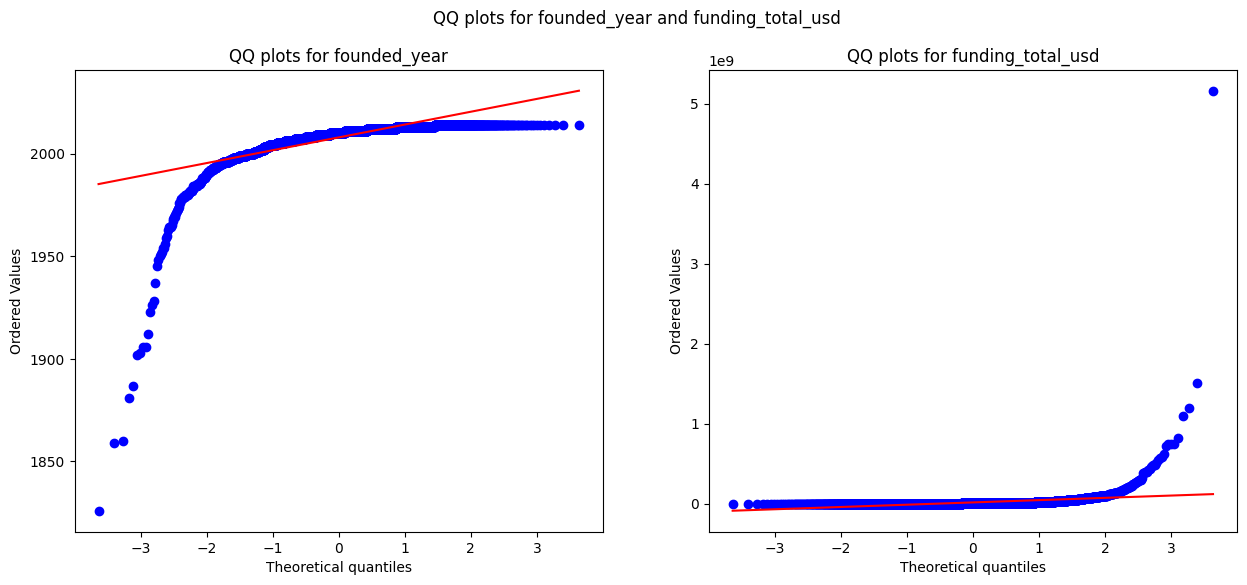

In [77]:
test_for_normality(sampled_df,'founded_year')
print("-"*100)
test_for_normality(sampled_df,'funding_total_usd')
print("-"*100)
test_for_homogeneity(sampled_df,'founded_year',sampled_df,'funding_total_usd')
print("-"*100)
test_for_normality_visual(sampled_df,'founded_year','funding_total_usd')

In [78]:
test_for_correlation(sampled_df,'founded_year','funding_total_usd')

Applying test for correlation between: founded_year and funding_total_usd

 Ho: No correlation exist between the two  
 Ha: Significant correlation exist between the two

 alpha=0.05

 P-value : 1.004262138534858e-171

 Rejecting the null hypothesis: There is a significant correlation between founded_year and funding_total_usd


In [79]:
# Homogeneity of variances check
groups = [sampled_df[sampled_df['founded_year'] == group]['funding_total_usd'] for group in sampled_df['founded_year'].unique()]
test_for_homogeneity_groups(groups)

Applying Levene's test for homogenity of groups

 Ho: Groups have equal variances 
 Ha: Groups have different variances

 alpha=0.05

 p-value is: 3.822061681358756e-43

 Rejecting the null hypothesis: The groups have a significant difference between the variances


- **Since we are comparing a numerical vs categorical column with more than 2 groups and also since the data is not normal and does not have equal variance, we can perform the Kruskal Wallis test**

In [80]:
kruskal_stat, p_value = kruskal(*groups)
print(f"Kruskal-Wallis test: p-value = {p_value}")


if p_value < 0.05:
    print("Rejecting the null hypothesis: There is a significant difference in funding across founded year groups.")
else:
    print("Accepting the null hypothesis: No significant difference in funding across founded year groups.")

Kruskal-Wallis test: p-value = 2.642429828680998e-131
Rejecting the null hypothesis: There is a significant difference in funding across founded year groups.


    2. Relationship between funding total and different market groups

In [81]:
groups = [sampled_df['funding_total_usd'][sampled_df['market'] == market] for market in sampled_df['market'].unique()]
test_for_homogeneity_groups(groups)

Applying Levene's test for homogenity of groups

 Ho: Groups have equal variances 
 Ha: Groups have different variances

 alpha=0.05

 p-value is: 0.9999999999999999

 Accepting the null hypothesis: The groups do not have a significant difference between the variances


- **Since we are comparing a numerical vs categorical column with more than 2 groups and also since the data is not normal and has equal variance, we can perform the Kruskal Wallis test**

In [82]:
kruskal_stat, p_value = kruskal(*groups)
if p_value < 0.05:
    print("Rejecting the null hypothesis: Significant difference in funding across different market groups.")
else:
    print("Accepting the null hypothesis: No significant difference in funding across different market groups.")

Rejecting the null hypothesis: Significant difference in funding across different market groups.


    3. Funding total difference between active and closed companies

In [83]:
df['status'].value_counts()

status
operating    41823
acquired      3692
closed        2602
Unknown       1314
Name: count, dtype: int64

In [84]:
closed_sample = sampled_df[sampled_df['status'] == 'closed'].sample(n=100, random_state=42)
operating_sample = sampled_df[sampled_df['status'] == 'operating'].sample(n=100, random_state=42)

In [85]:
# Check normality
test_for_normality(operating_sample,'funding_total_usd')

print("-"*100)

test_for_normality(closed_sample,'funding_total_usd')

print("-"*100)

# Check homogeneity of variance
test_for_homogeneity(operating_sample,'funding_total_usd',closed_sample,'funding_total_usd' )



Applying Shapiro-Wilk test for normality on column: funding_total_usd

 Ho: The sample follows normal distribution 
 Ha: The sample does not follow normal distribution

 alpha=0.05

 p-value for funding_total_usd is: 3.855863101475338e-18

 Rejecting the null hypothesis: The sample does not follow normal distribution
----------------------------------------------------------------------------------------------------
Applying Shapiro-Wilk test for normality on column: funding_total_usd

 Ho: The sample follows normal distribution 
 Ha: The sample does not follow normal distribution

 alpha=0.05

 p-value for funding_total_usd is: 1.275046064797783e-18

 Rejecting the null hypothesis: The sample does not follow normal distribution
----------------------------------------------------------------------------------------------------
Applying Levene's test for homogenity of groups between: funding_total_usd and funding_total_usd

 Ho: Groups have equal variances 
 Ha: Groups have different v

In [86]:
group_a = operating_sample['funding_total_usd']
group_b = closed_sample['funding_total_usd'] 

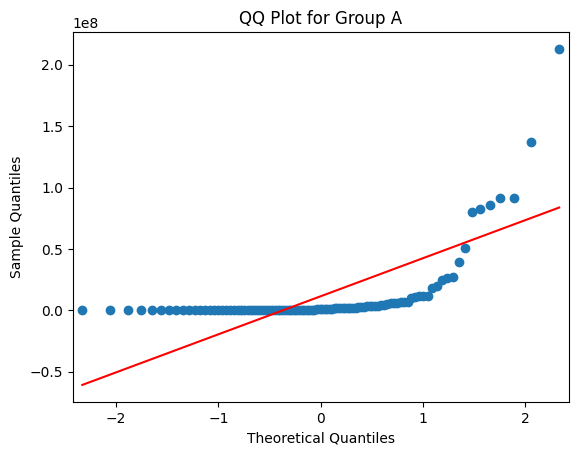

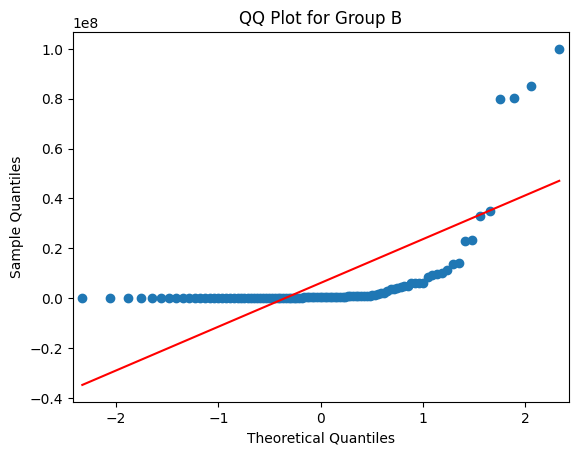

In [87]:
import statsmodels.api as sm

sm.qqplot(group_a, line='s')
plt.title("QQ Plot for Group A")
plt.show()

sm.qqplot(group_b, line='s')
plt.title("QQ Plot for Group B")
plt.show()

- **Since we are comparing a numerical vs categorical column with exactly 2 groups and also since the data is not normal but has equal variance, we can perform the Mann Whitney U test (independent t-test)**

In [88]:
stat, p = mannwhitneyu(group_a, group_b, alternative='two-sided')
print(f"Mann-Whitney U Test: p = {p}")


if p < 0.05:
    print( 'Reject the null hypothesis. There is a significant difference in funding_total between active and closed companies')
else: 
    print('Fail to reject the null hypothesis. There is no significant difference in funding_total between active and closed companies')

Mann-Whitney U Test: p = 0.315657997954806
Fail to reject the null hypothesis. There is no significant difference in funding_total between active and closed companies


    4. Relationship of market with respect to funding types

In [89]:
funding_rounds_relation.head()

,market,funding_types_split,funding_rounds
265,Biotechnology,venture,6579.0
2727,Software,venture,5295.0
255,Biotechnology,debt_financing,2541.0
1311,Health Care,venture,2234.0
1836,Mobile,venture,2160.0


In [90]:
seed(2)
sampled_df = funding_rounds_relation.sample(n=40)

In [91]:
contingency_table = pd.crosstab(sampled_df['market'], sampled_df['funding_types_split'])

# Perform Chi-Square Test of Independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p)

if p < 0.05:
    print("Reject the null hypothesis: Market and Funding Types are associated.")
else:
    print("Fail to reject the null hypothesis: Market and Funding Types are independent.")

Chi-Square Statistic: 320.0
Degrees of Freedom: 312
P-value: 0.3653498605910427
Fail to reject the null hypothesis: Market and Funding Types are independent.


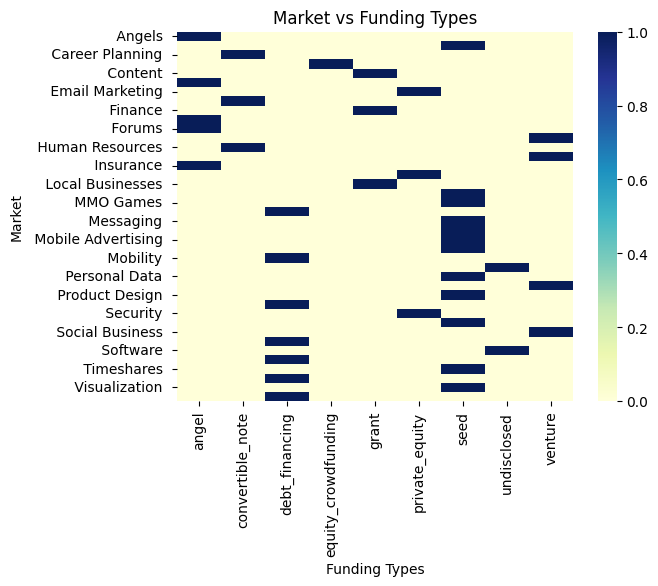

In [92]:
sns.heatmap(contingency_table, cmap="YlGnBu")
plt.title("Market vs Funding Types")
plt.xlabel("Funding Types")
plt.ylabel("Market")
plt.show()

Its evident that mostly the market is independent of the funding type

    5. Relationship of GDP with respect to funding total

In [93]:
high_gdp = merged_data[merged_data['GDP'] > merged_data['GDP'].median()]['funding_total_usd']
low_gdp = merged_data[merged_data['GDP'] <= merged_data['GDP'].median()]['funding_total_usd']

t_stat, p_value = ttest_ind(high_gdp, low_gdp)
print(f"T-test: t_stat={t_stat}, p_value={p_value}")
if p_value < 0.05:
    print("Significant difference in funding between high and low GDP years.")
else:
    print("No significant difference in funding between high and low GDP years.")

T-test: t_stat=-4.987498734533788, p_value=6.139898850382001e-07
Significant difference in funding between high and low GDP years.


    6. Relationship between funding rounds and funding total

In [94]:
funding_rounds_relation = (
    filtered_df.groupby(['market', 'funding_types_split']).agg(
        funding_rounds= ('funding_rounds','mean'),
        funding_total= ('funding_total_usd','sum')
    )
    .reset_index()
    .sort_values(by='funding_rounds', ascending=False)
)

In [95]:
funding_rounds_relation.head()

,market,funding_types_split,funding_rounds,funding_total
1332,Health and Wellness,secondary_market,12.0,157519998.0
1005,Enterprises,grant,12.0,1507200.0
646,Credit,undisclosed,12.0,392230000.0
644,Credit,private_equity,12.0,392230000.0
178,Automotive,post_ipo_equity,11.0,823000000.0


In [96]:
seed(2)
sampled_df = funding_rounds_relation.sample(n=2000)

In [97]:
test_for_correlation(sampled_df,'funding_rounds','funding_total')

Applying test for correlation between: funding_rounds and funding_total

 Ho: No correlation exist between the two  
 Ha: Significant correlation exist between the two

 alpha=0.05

 P-value : 2.0206875471739466e-85

 Rejecting the null hypothesis: There is a significant correlation between funding_rounds and funding_total


-------

### **6. Detailed Insights**

#### **1. Funding Trends Over Time**
- **Observation:**  
  The trend of average annual funding per round shows a decline over recent years.
- **Insight:**  
  - This indicates a possible tightening of the funding environment, likely due to global economic uncertainties, changing investor priorities, or saturation in certain markets.
  - Startups must demonstrate stronger value propositions to stand out in a competitive environment.

#### **2. Funding Distribution by Market**
- **Observation:**  
  Markets like healthcare, fintech, and AI attract the highest funding, whereas others like retail or manufacturing attract less funding.  
- **Insight:**  
  - High-performing sectors reflect where innovation and growth potential are perceived to be strongest by investors.  
  - Emerging technologies, especially AI, align with global trends such as automation, healthcare tech, and green initiatives.

#### **3. Niche vs. Broad Markets**
- **Observation:**  
  Funding in niche markets slightly exceeds that of broader markets.  
- **Insight:**  
  - Investors are more inclined to fund specialized startups that address specific problems with clear solutions.
  - However, broad markets remain significant due to their scalability and impact.

#### **4. Regional Trends**
- **Observation:**  
  Regions like San Francisco, New York, and London dominate startup funding.  
- **Insight:**  
  - These regions likely benefit from robust networks of investors, accelerators, talent pools, and infrastructure.  
  - Startups in these hubs may face intense competition but gain access to resources critical for scaling.

#### **5. Funding Types and Rounds**
- **Observation:**  
  Later rounds like Series B and Series C secure significantly higher funding compared to early rounds (Seed, Series A).  
- **Insight:**  
  - Startups with proven traction and growth metrics attract more investor confidence.
  - Early-stage funding remains critical but is distributed among a broader pool of startups.

#### **6. Economic Impact (GDP Analysis)**
- **Observation:**  
  The correlation between GDP and total funding is weak.  
- **Insight:**  
  - While GDP reflects macroeconomic conditions, funding decisions are more influenced by regional ecosystems, sector performance, and investor behavior.
  - Startup funding seems decoupled from broader economic trends and driven more by localized or sector-specific dynamics.

---

### **7. Comprehensive Business Recommendations**

#### **For Startups**
1. **Positioning in High-Growth Markets:**  
   - Target sectors with the highest funding potential, such as AI, fintech, and healthcare.  
   - For niche markets, focus on specialized, scalable solutions that can demonstrate clear demand.  

2. **Location Strategy:**  
   - Consider operating in top regions like San Francisco, New York, or London to leverage established ecosystems, mentorship, and access to funding.  
   - Startups in underrepresented regions should work on building strong networks and partnerships to compensate for a lack of existing infrastructure.  

3. **Strategic Fundraising:**  
   - Prioritize building strong early traction in product development and customer acquisition to increase chances of securing larger funding in later rounds.  
   - Prepare for intense scrutiny during Series B and C funding by presenting strong growth metrics and financials.  

4. **Resource Optimization:**  
   - Given the decline in funding trends, startups should focus on optimizing operations and extending runway through efficient use of funds.



#### **For Investors**
1. **Sector-Focused Investments:**  
   - Continue investing in high-performing sectors while keeping an eye on emerging niches with growth potential (e.g., green tech, edtech).  
   - Diversify portfolios across broad and niche markets to balance risk and reward.  

2. **Support Early-Stage Startups:**  
   - Focus on identifying promising startups during early rounds (Seed, Series A) and provide mentorship to help them scale to later rounds.  

3. **Regional Expansion:**  
   - Consider expanding investments into underserved regions with untapped potential, leveraging local talent and government incentives.  

4. **Monitor Market Trends:**  
   - Stay updated on evolving sectors (e.g., AI in healthcare or fintech innovation) to align investments with emerging opportunities.  



#### **For Policymakers and Ecosystem Developers**
1. **Encourage Regional Growth:**  
   - Promote policies that support startup ecosystems in underfunded regions through tax incentives, grants, and public-private partnerships.  
   - Facilitate the creation of accelerators and incubators in tier-2 cities.  

2. **Streamline Regulatory Processes:**  
   - Simplify regulatory frameworks to attract both domestic and foreign investments.  

3. **Foster Innovation in Key Sectors:**  
   - Encourage R&D in promising sectors like AI, healthcare, and renewable energy by offering subsidies and grants to startups.  



#### **Strategic Roadmap**
1. **For Startups:**  
   - Prioritize high-value markets and regions.  
   - Build a strong product-market fit before scaling.  

2. **For Investors:**  
   - Focus on a mix of emerging sectors and later-stage rounds to ensure balanced portfolios.  

3. **For Policymakers:**  
   - Create initiatives to reduce regional funding gaps and provide growth opportunities for startups in emerging markets.